- Importing the necessary Modules and Packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

- Loading the dataset into a DataFrame.

In [2]:
bank_data = pd.read_csv("bank-full.csv", sep=";")
bank_data.head().T

0            1            2            3  \
age                      56           57           37           40   
job               housemaid     services     services       admin.   
marital             married      married      married      married   
education          basic.4y  high.school  high.school     basic.6y   
default                  no      unknown           no           no   
housing                  no           no          yes           no   
loan                     no           no           no           no   
contact           telephone    telephone    telephone    telephone   
month                   may          may          may          may   
day_of_week             mon          mon          mon          mon   
duration                261          149          226          151   
campaign                  1            1            1            1   
pdays                   999          999          999          999   
previous                  0            0            0            0   
poutcome        nonexistent  nonexistent  nonexistent  nonexistent   
emp.var.rate            1.1          1.1          1.1          1.1   
cons.price.idx       93.994       93.994       93.994       93.994   
cons.conf.idx         -36.4        -36.4        -36.4        -36.4   
euribor3m             4.857        4.857        4.857        4.857   
nr.employed          5191.0       5191.0       5191.0       5191.0   
y                        no           no           no           no   

                          4  
age                      56  
job                services  
marital             married  
education       high.school  
default                  no  
housing                  no  
loan                    yes  
contact           telephone  
month                   may  
day_of_week             mon  
duration                307  
campaign                  1  
pdays                   999  
previous                  0  
poutcome        nonexistent  
emp.var.rate            1.1  
cons.price.idx       93.994  
cons.conf.idx         -36.4  
euribor3m             4.857  
nr.employed          5191.0  
y                        no

- The data is [41188, 21] dimensions, Seems that there is no missing  values  in the dataset. 

In [33]:
bank_data.info()  # Displaying some Information about the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [34]:
# Displaying a description about the categorical columns in the dataset.
bank_data.describe(include=np.number)

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

- We can create CountPlots for all those variables Because there are A few Unique values in each categorical columns.

In [35]:
# Displaying a description about the Numerical columns in the dataset.
bank_data.describe(include=np.object)

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

# Distributions

- Let's look at the distribution of all the variables at once with the kde.

- From the histograms, KDEs on them and the Skewness factor we can tell
1. is roughly normally distributed.
2. duration is right skewed.
3. campaign is right  skewed.
4. pdays is left skewed.
5. previous is right skewed.
6. emp.var.rate is Multimodal with 4 peeks.
7. cons.price.idx is Multimodal with 6 peeks.
8. cons.conf.idx is Multimodal with 3 peeks.
9. euribor3m is Multimodal with 3 peeks.
10. nr.employed is Multimadal with 4 peeks.

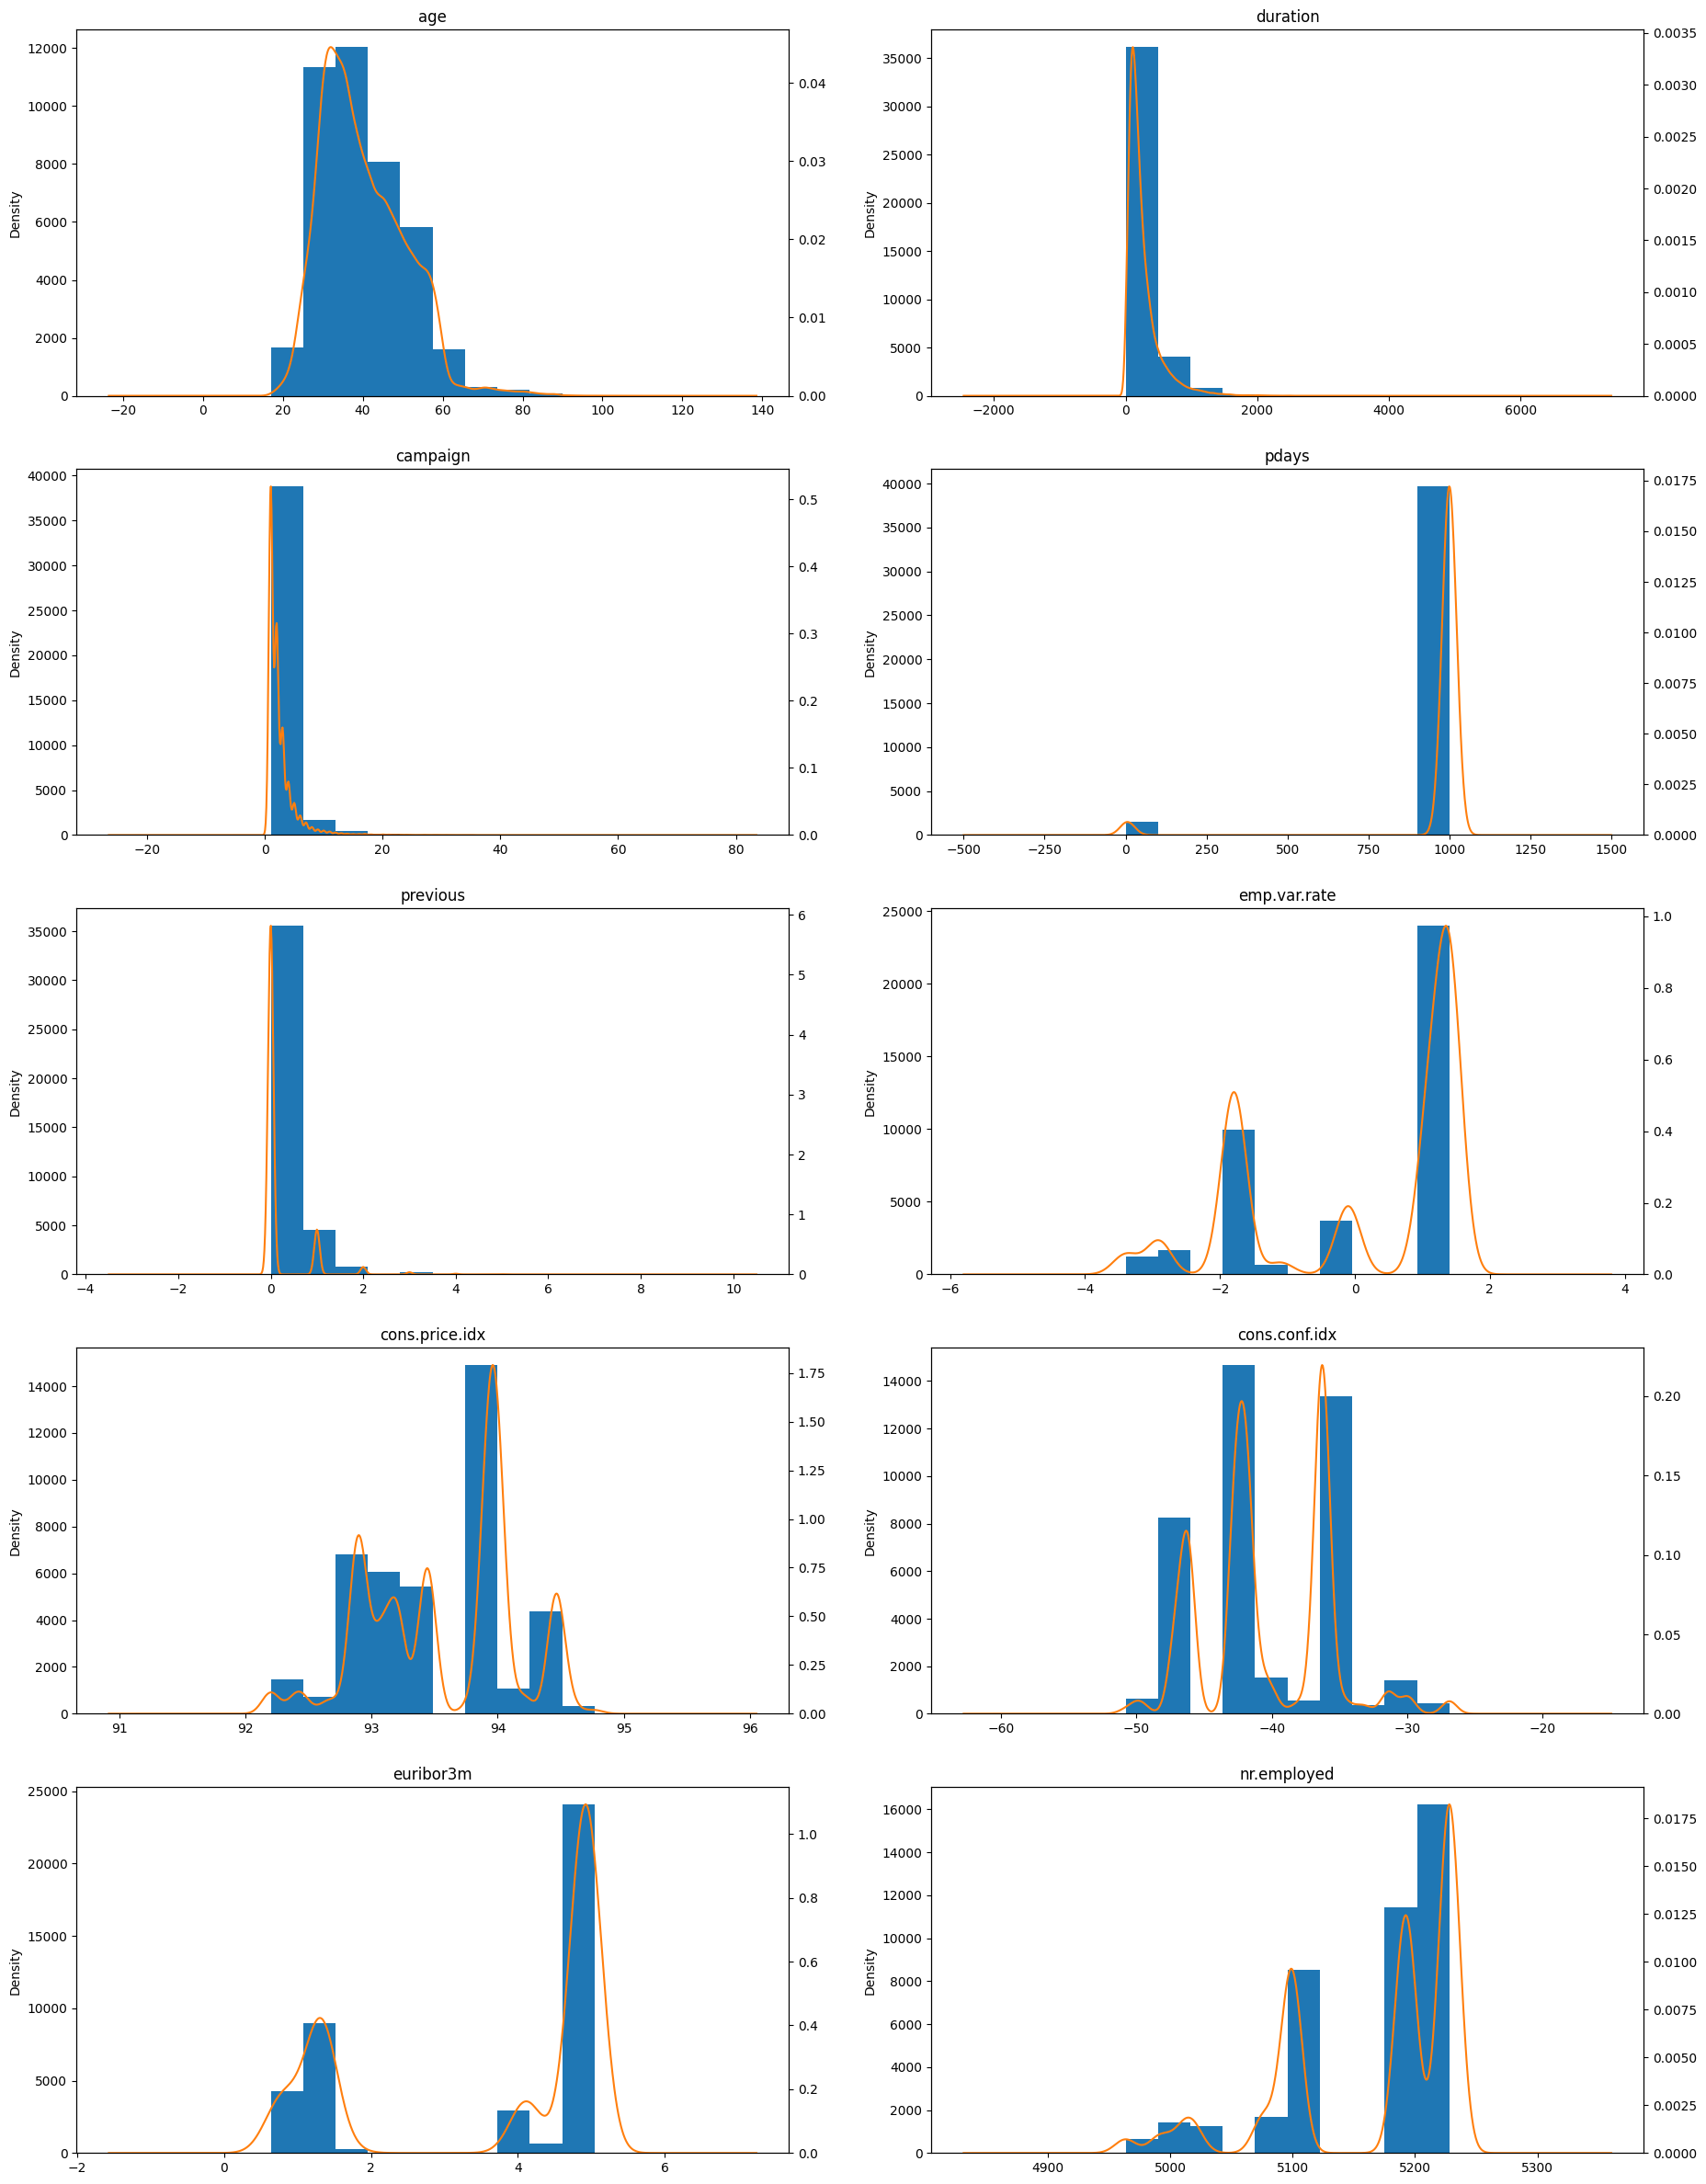

In [36]:
numerical_cols = bank_data.select_dtypes(exclude='object')

k = len(numerical_cols.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(22, 30))
for i, (name, col) in enumerate(numerical_cols.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

plt.savefig('figs/all_numerical_distributions.png', format='png')

In [37]:
numerical_cols.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

# Coutplots:

-  admin, blue-collar, technician  are the top 3 jobs in our dataset.

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


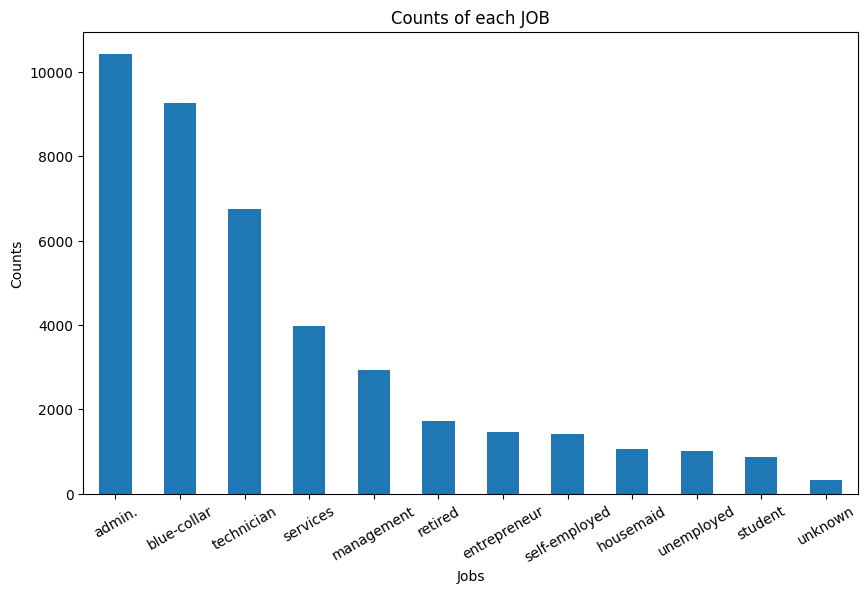

In [38]:
plot_data = bank_data['job'].value_counts()
plot_data.plot(rot=30, kind='bar', figsize=(10, 6))
plt.xlabel('Jobs')
plt.ylabel('Counts')
plt.title('Counts of each JOB')
plt.savefig('figs/Counts of each JOB')

print(plot_data)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


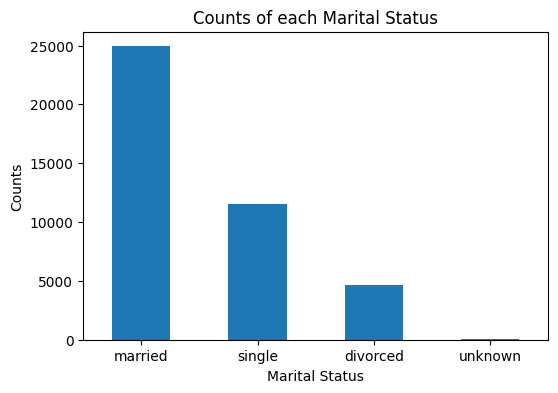

In [39]:
plot_data = bank_data['marital'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Marital Status')
plt.ylabel('Counts')
plt.title('Counts of each Marital Status')
plt.savefig('figs/Counts of each Marital Status')

print(plot_data)

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


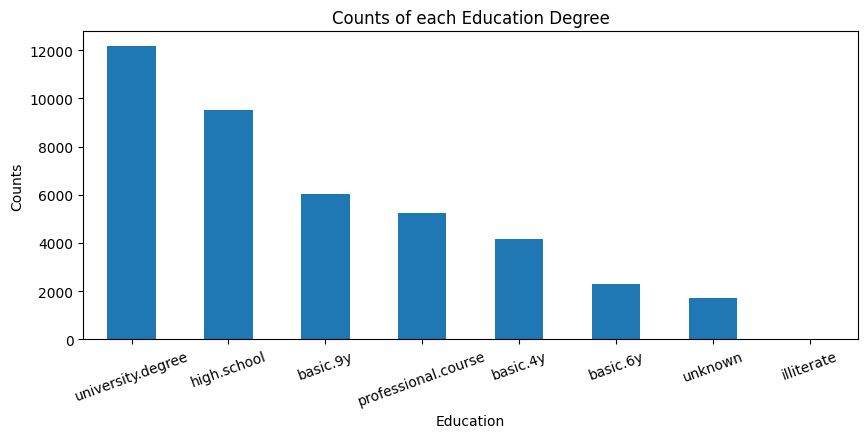

In [40]:
plot_data = bank_data['education'].value_counts()
plot_data.plot(rot=20, kind='bar', figsize=(10, 4))
plt.xlabel('Education')
plt.ylabel('Counts')
plt.title('Counts of each Education Degree')
plt.savefig('figs/Counts of each Education')

print(plot_data)

no         32588
unknown     8597
yes            3
Name: default, dtype: int64


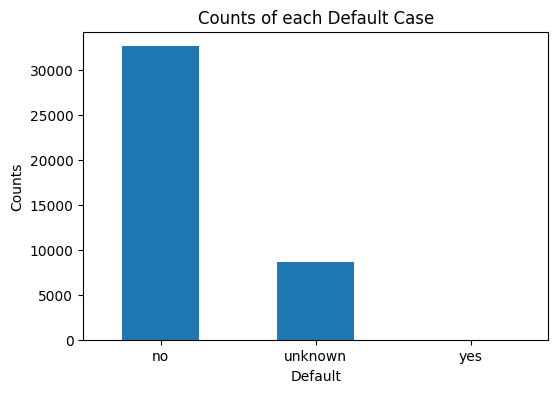

In [41]:
plot_data = bank_data['default'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Default')
plt.ylabel('Counts')
plt.title('Counts of each Default Case')
plt.savefig('figs/Counts of each Default')

print(plot_data)

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


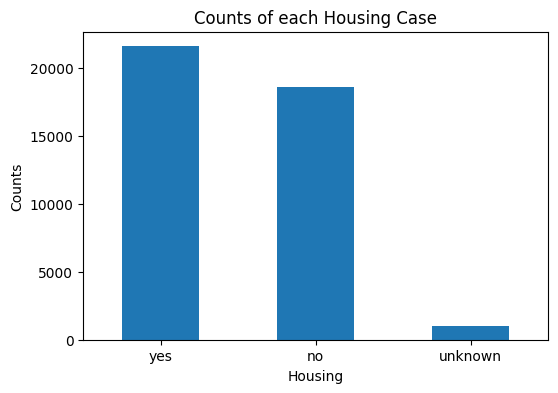

In [42]:
plot_data = bank_data['housing'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Housing')
plt.ylabel('Counts')
plt.title('Counts of each Housing Case')
plt.savefig('figs/Counts of each Housing')

print(plot_data)

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


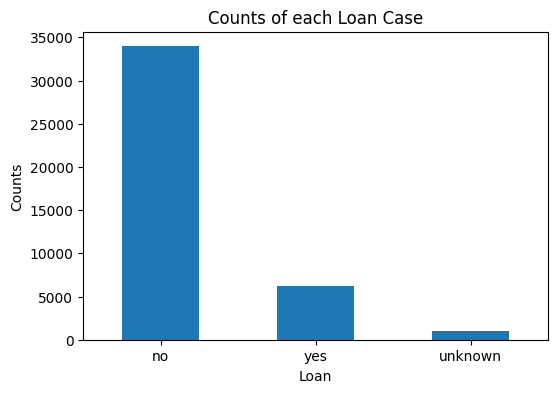

In [43]:
plot_data = bank_data['loan'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Loan')
plt.ylabel('Counts')
plt.title('Counts of each Loan Case')
plt.savefig('figs/Counts of each Loan')

print(plot_data)

cellular     26144
telephone    15044
Name: contact, dtype: int64


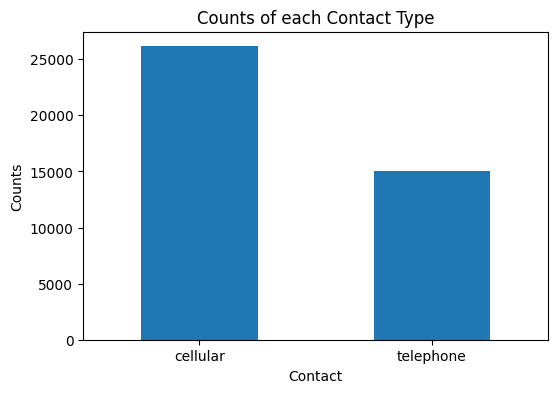

In [44]:
plot_data = bank_data['contact'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Contact')
plt.ylabel('Counts')
plt.title('Counts of each Contact Type')
plt.savefig('figs/Counts of each Contact Type')

print(plot_data)

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64


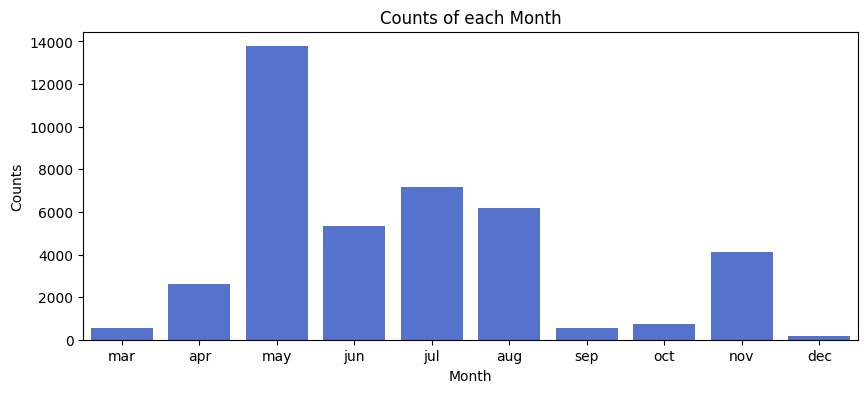

In [45]:
months_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(10, 4))
plot_data = bank_data['month'].value_counts()
sns.countplot(data=bank_data,\
              x='month',\
              order=months_order,\
                color='RoyalBlue')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of each Month')
plt.savefig('figs/Counts of each Month')

print(plot_data)

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64


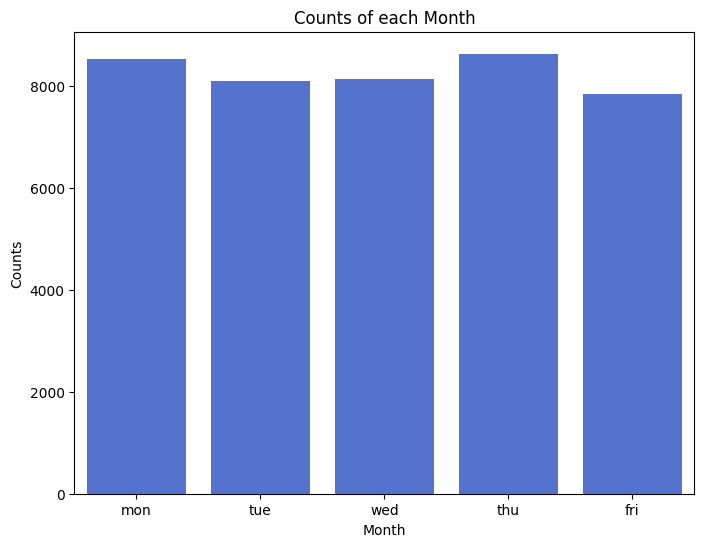

In [46]:
days_order = bank_data.day_of_week.unique()

plt.figure(figsize=(8, 6))
plot_data = bank_data['day_of_week'].value_counts()
sns.countplot(data=bank_data,\
              x='day_of_week',\
              order=days_order,\
                color='RoyalBlue')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Counts of each Month')
plt.savefig('figs/Counts of each Month')

print(plot_data)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64


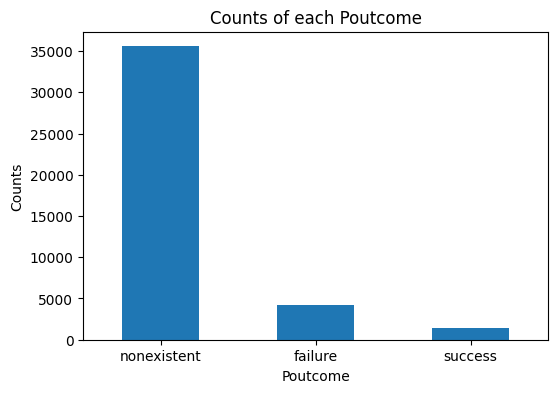

In [47]:
plot_data = bank_data['poutcome'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Poutcome')
plt.ylabel('Counts')
plt.title('Counts of each Poutcome')
plt.savefig('figs/Counts of each Poutcome')

print(plot_data)

no     36548
yes     4640
Name: y, dtype: int64


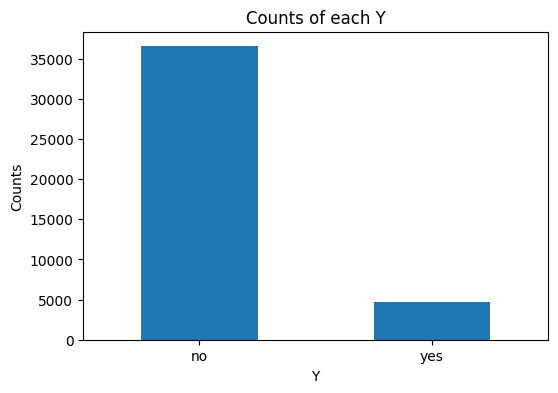

In [48]:
plot_data = bank_data['y'].value_counts()
plot_data.plot(rot=0, kind='bar', figsize=(6, 4))
plt.xlabel('Y')
plt.ylabel('Counts')
plt.title('Counts of each Y')
plt.savefig('figs/Counts of each Y')

print(plot_data)

## Grouping by each categorical column to see how many yes/no values it containg for the Y column.

In [49]:
def plot_y_colvalues(col, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    sns.countplot(data=bank_data, x=col, hue='y')
    plt.xlabel(f'{col}')
    plt.ylabel('Y Counts')
    plt.title(f'Counts of y values for each {col}')
    plt.savefig(f'figs/Counts of y for {col}')

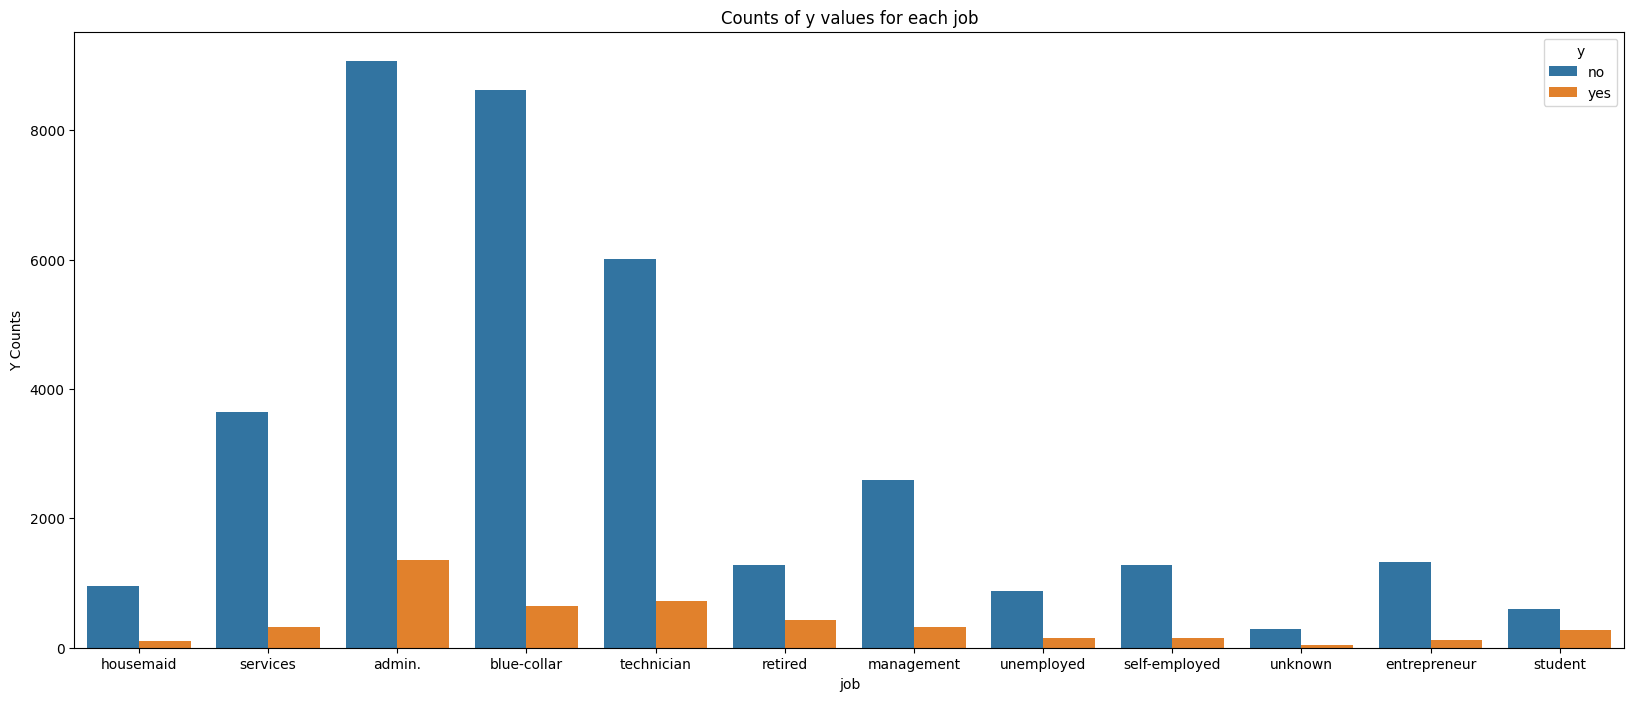

In [50]:
plot_y_colvalues('job', figsize=(20, 8))

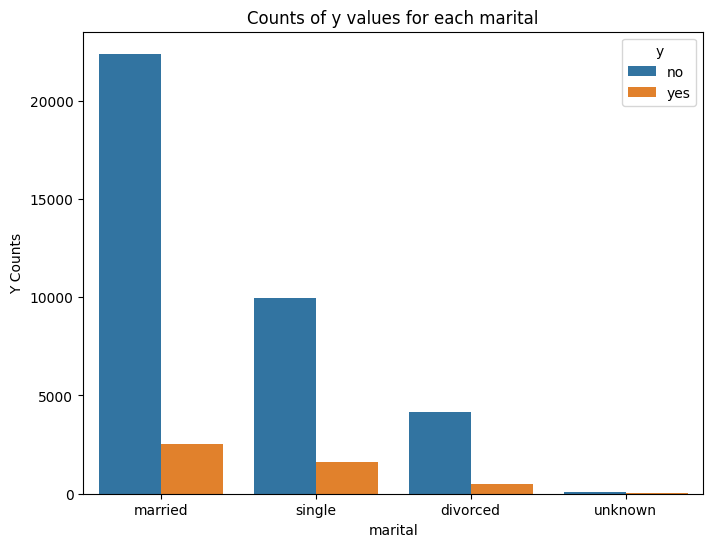

In [51]:
plot_y_colvalues('marital', figsize=(8, 6))

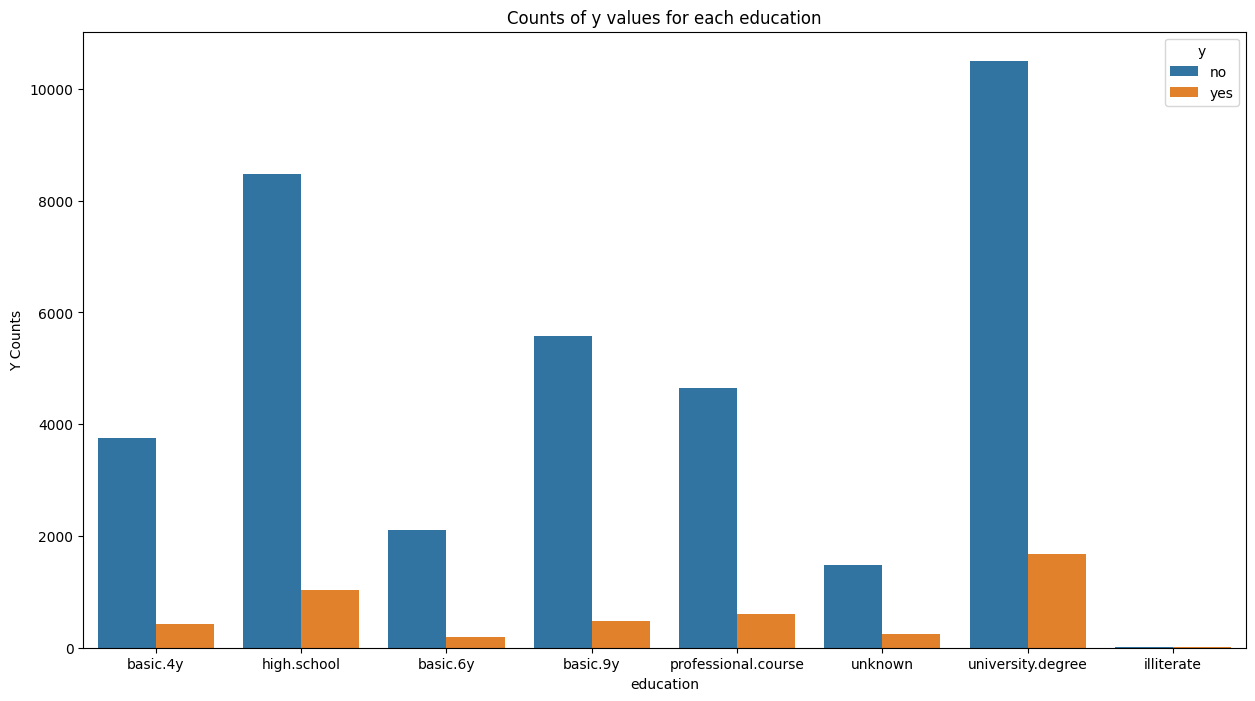

In [52]:
plot_y_colvalues('education')

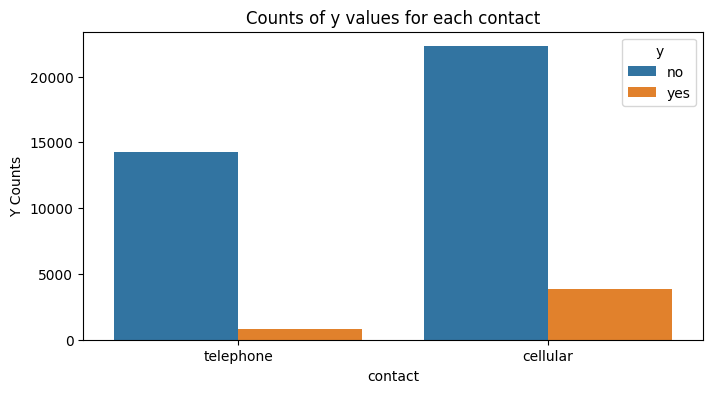

In [53]:
plot_y_colvalues('contact', figsize=(8, 4))

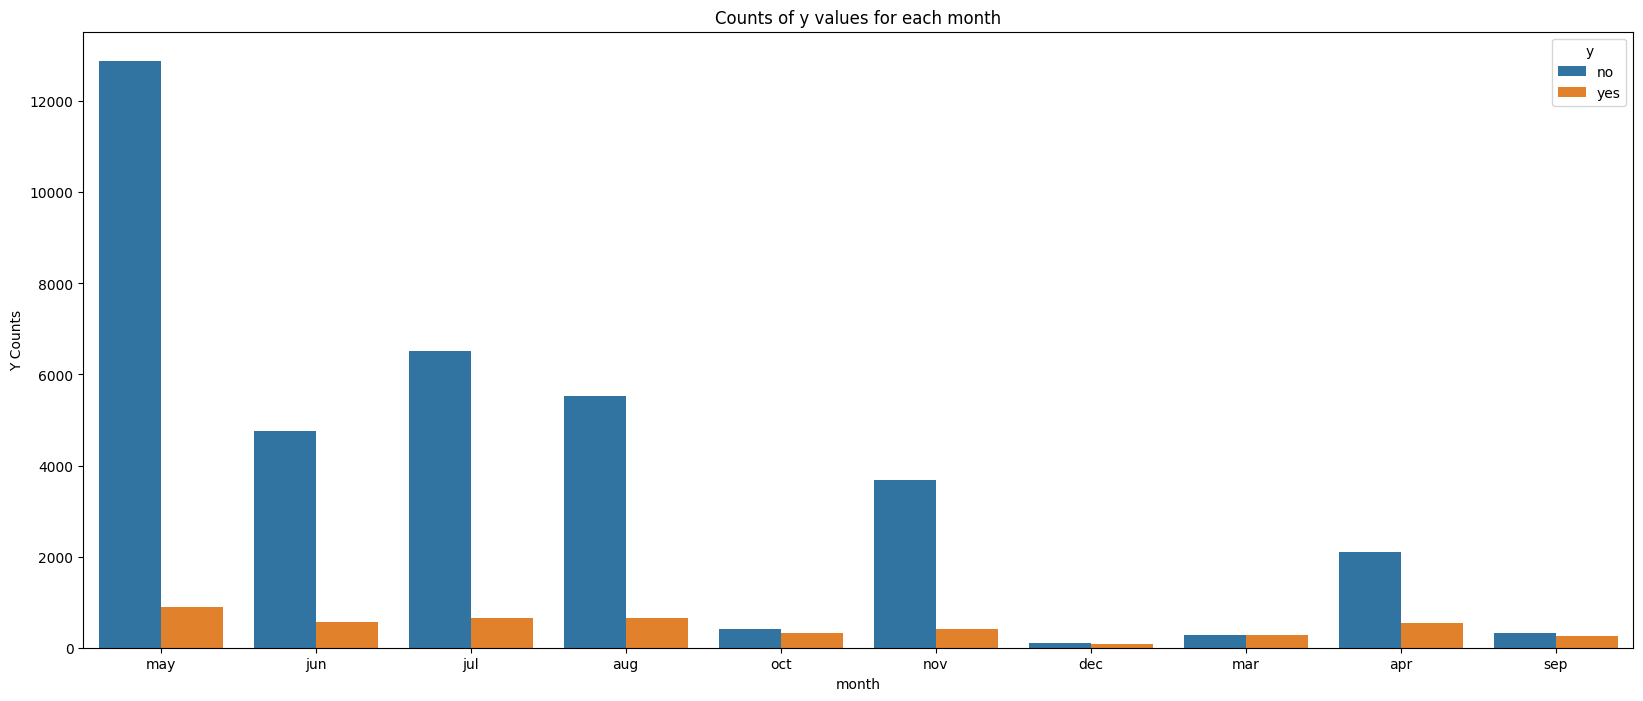

In [54]:
plot_y_colvalues('month', figsize=(20, 8))

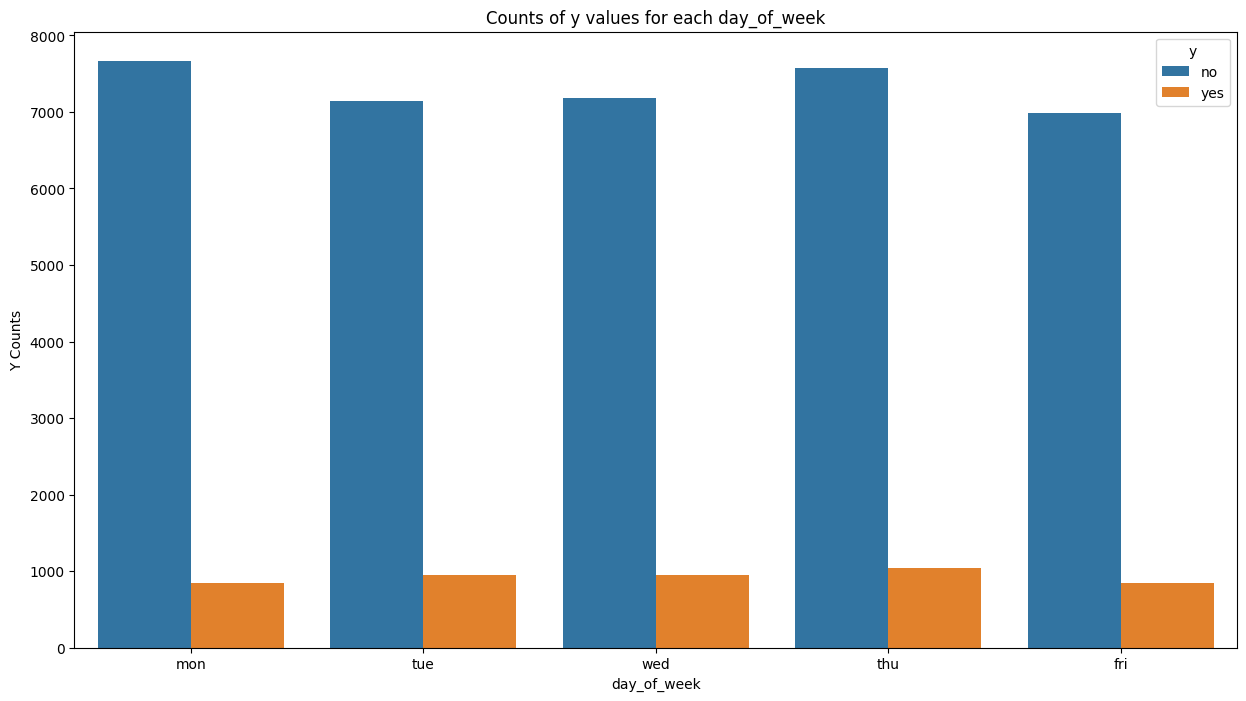

In [55]:
plot_y_colvalues('day_of_week')

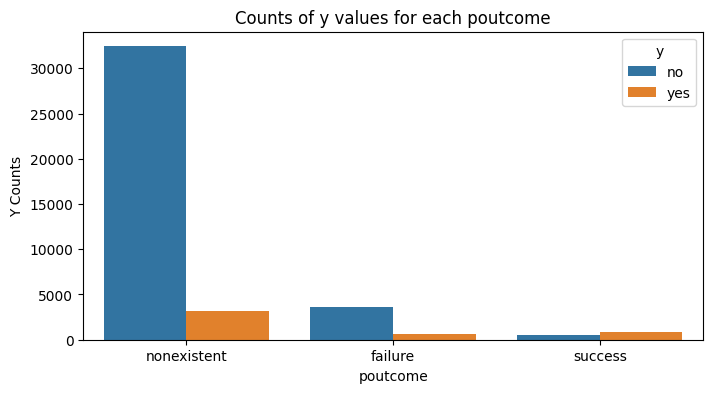

In [56]:
plot_y_colvalues('poutcome', figsize=(8, 4))

# Relations:

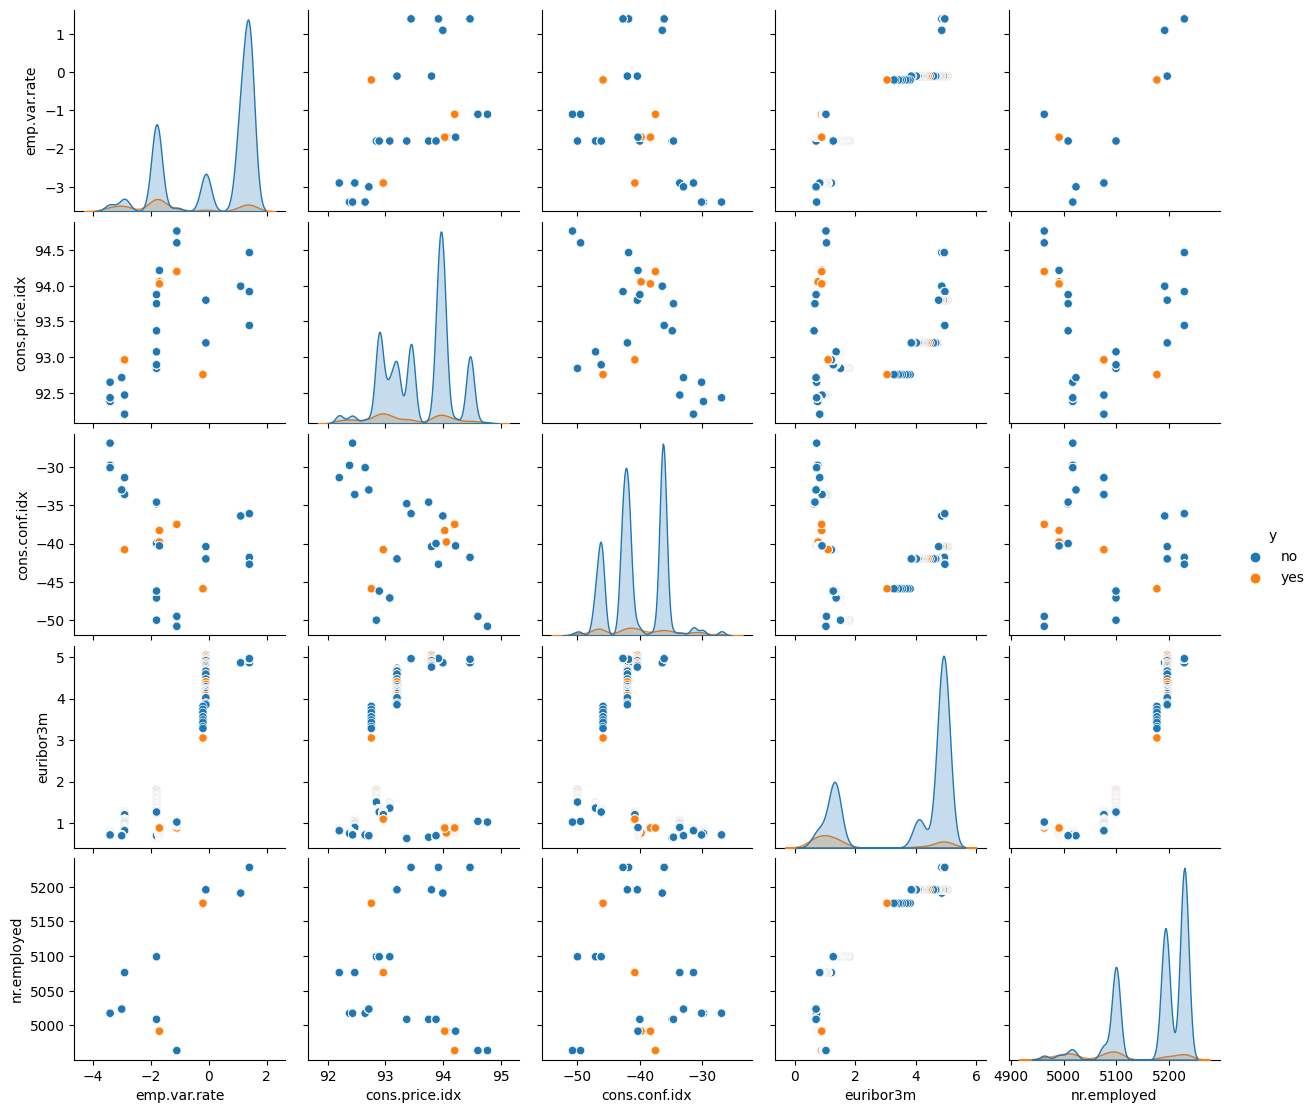

In [3]:
floating_data = bank_data.select_dtypes(include='float64')
floating_data['y'] = bank_data['y']

g = sns.pairplot(data=floating_data, hue='y')

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.subplots_adjust(top=0.92, bottom=0.08)

plt.savefig('figs/Relations between all the Floating Columns.png', format='png')
plt.show()

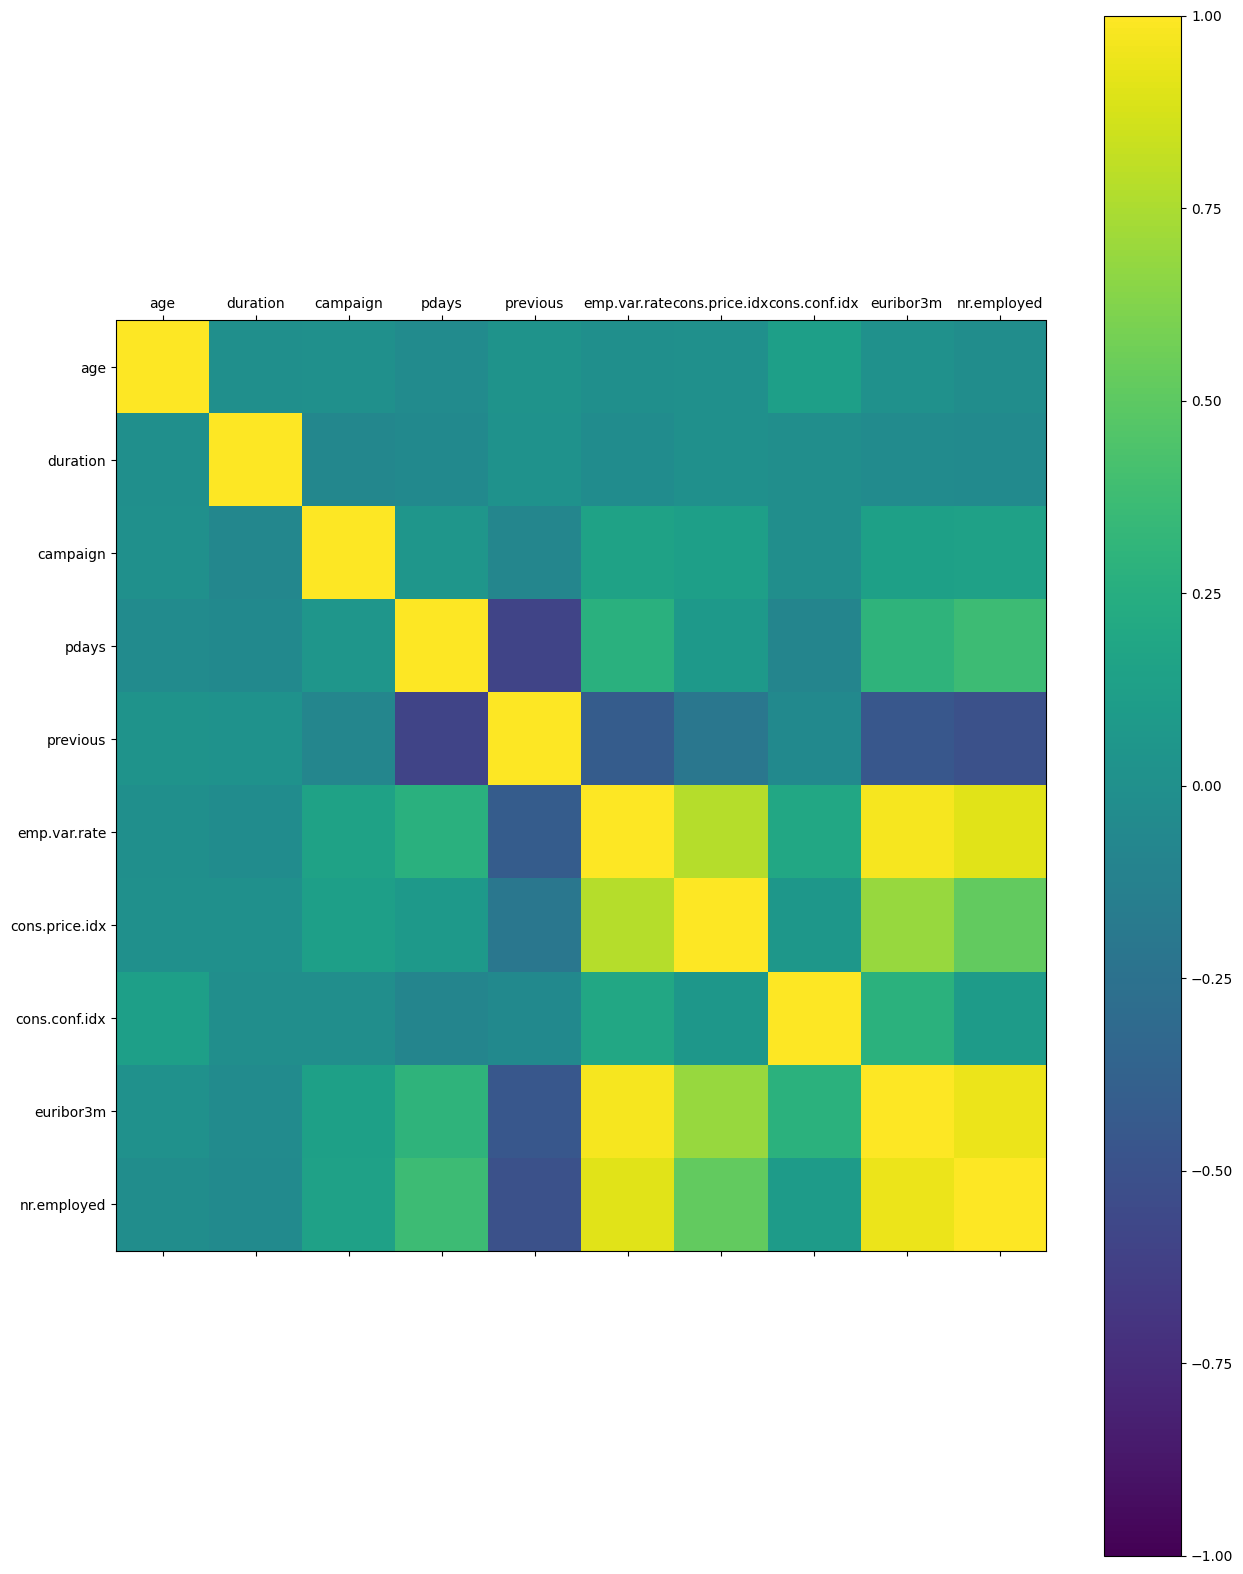

In [58]:
numerical_data = bank_data.select_dtypes(exclude='object')
correlations = numerical_data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, numerical_data.shape[1])
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(numerical_data.columns)
ax.set_yticklabels(numerical_data.columns)

plt.savefig('figs/Correlation matrix.png', format='png')

- There is a problem here most of the points overlap.

In [59]:
def plot_correlation(data):
    data['y'] = bank_data['y']
    mask = data['y'] == 'no'
    y_no = data[mask]
    y_yes = data[~mask]
    data.drop('y', axis=1, inplace=True)
    cols = data.columns
    for col in cols:
        for i in cols:
            corr_y = np.corrcoef(y_yes[col], y_yes[i])[0, 1]
            
            fig = plt.figure(figsize=(8, 4))
            ax = fig.add_subplot(111)
            ax = sns.regplot(x=col, y=i, data=y_yes,\
                    label= f"Yes|{col}|{i} (correlation: {np.round(corr_y, 3)})")

            corr_n = np.corrcoef(y_no[col], y_no[i])[0, 1]
            ax = sns.regplot(x=col, y=i, data=y_no,\
                    label=f"No|{col}|{i} (correlation: {np.round(corr_n, 3)})",\
                    scatter_kws={"alpha":0.05})
            ax.legend()
            plt.savefig(f'figs/regression correlation {col} AND {i}.png', format='png')
            plt.show()

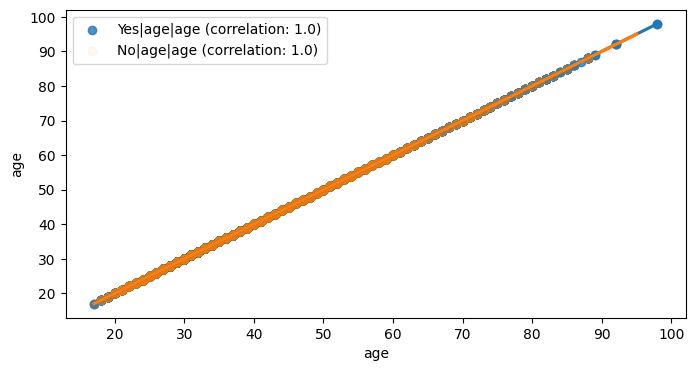

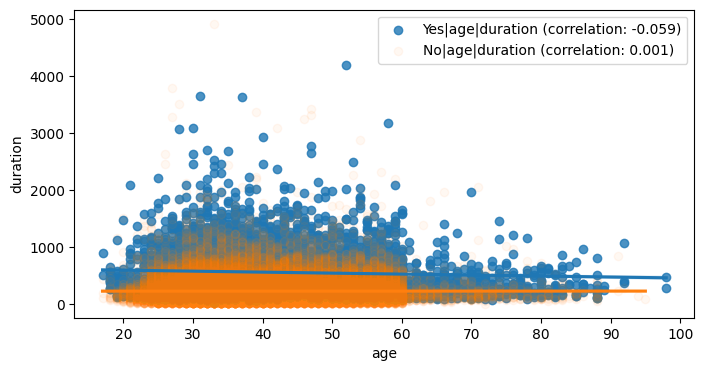

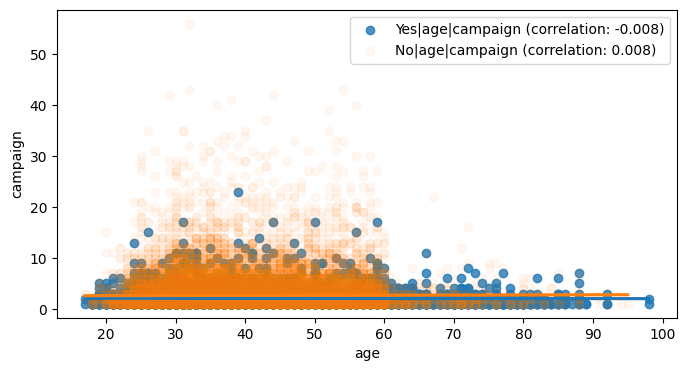

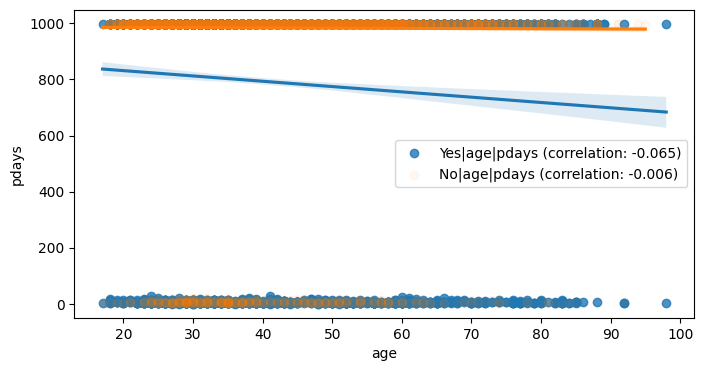

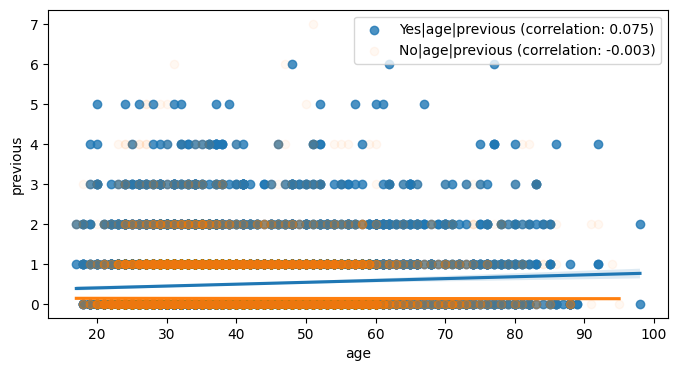

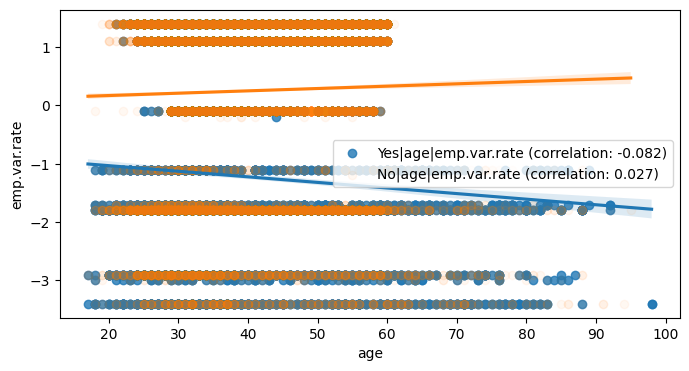

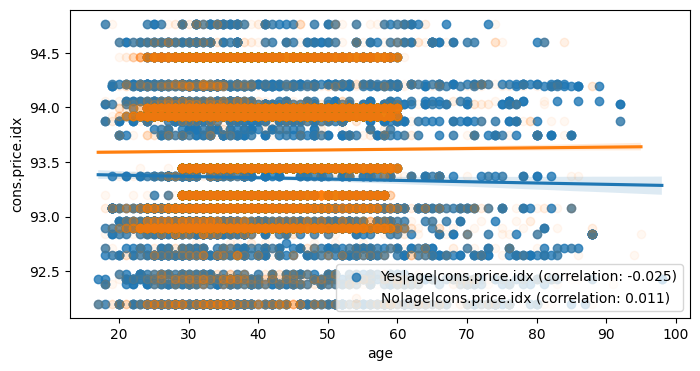

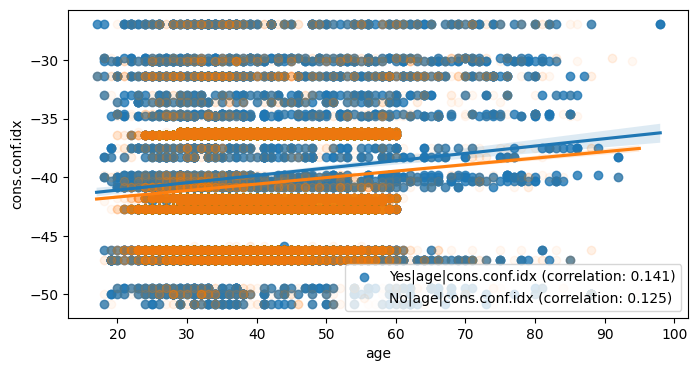

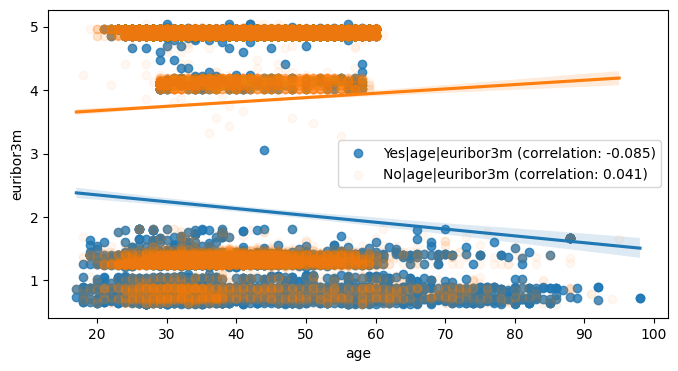

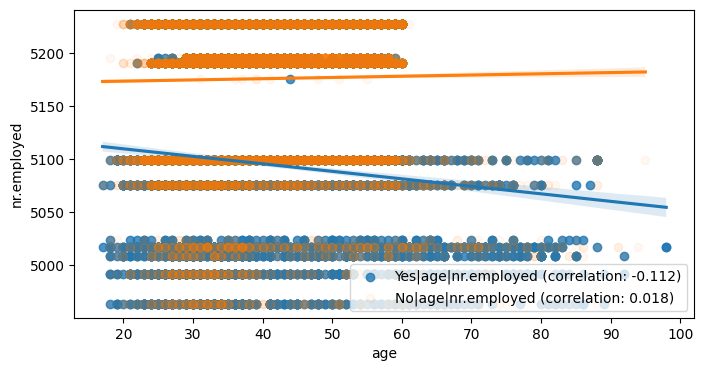

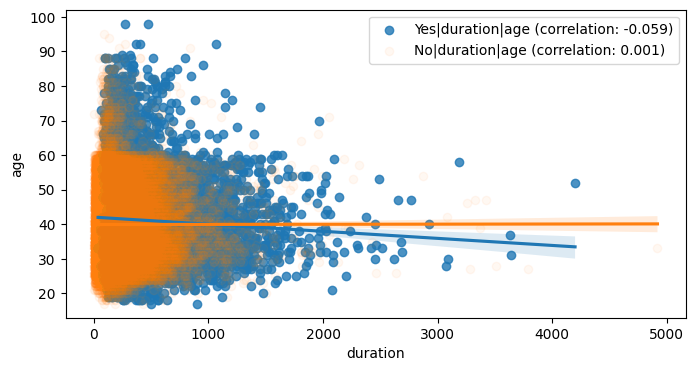

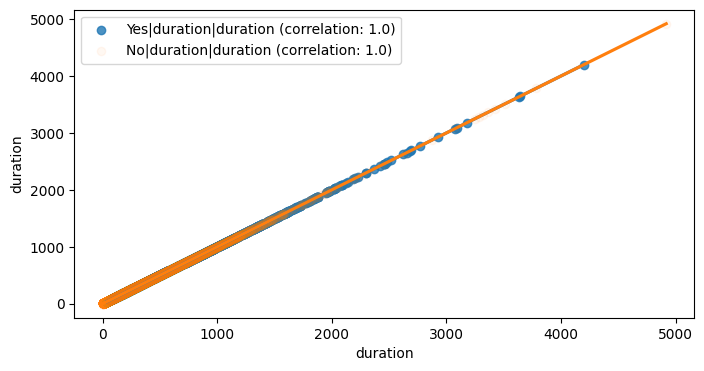

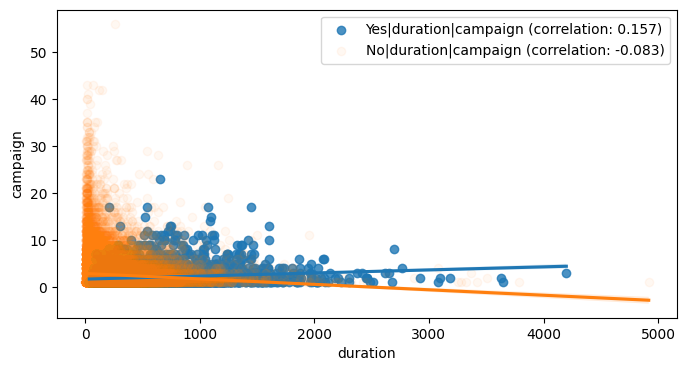

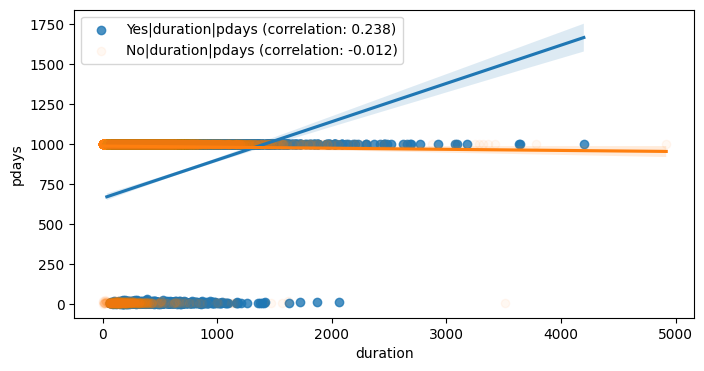

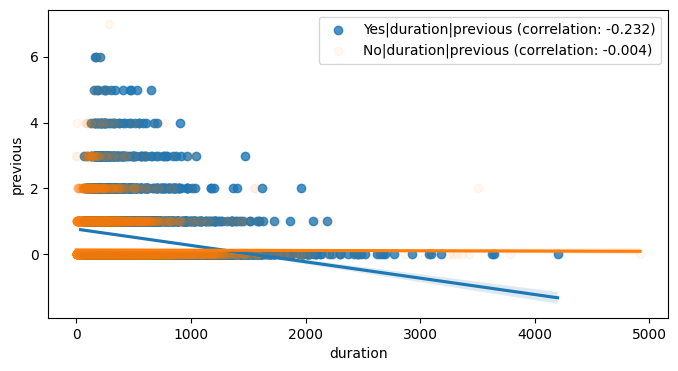

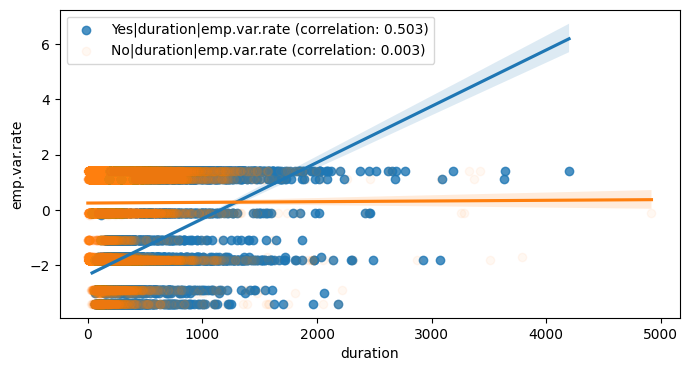

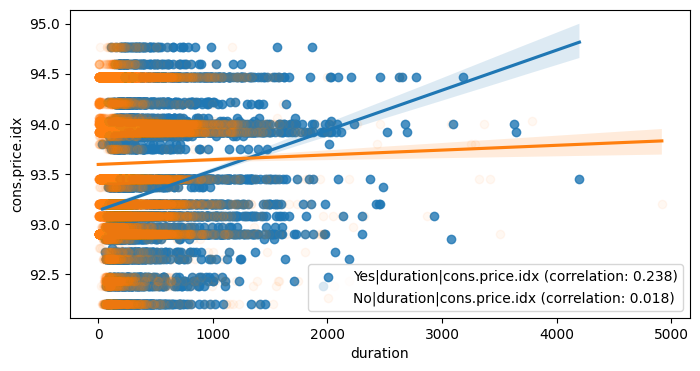

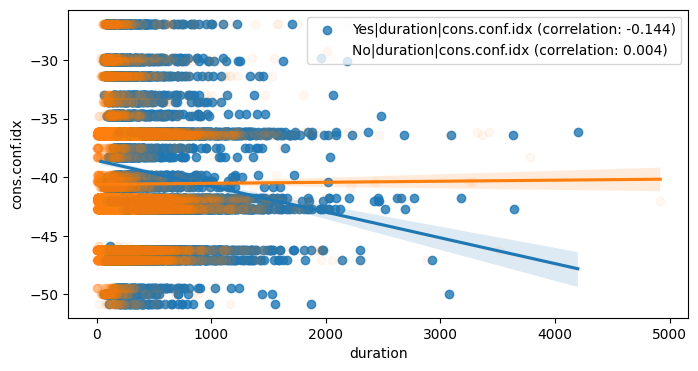

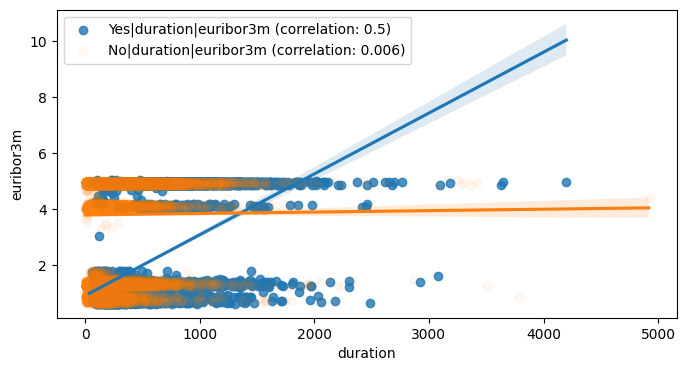

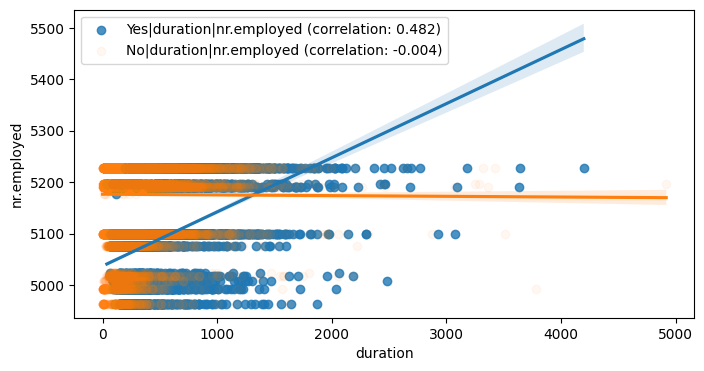

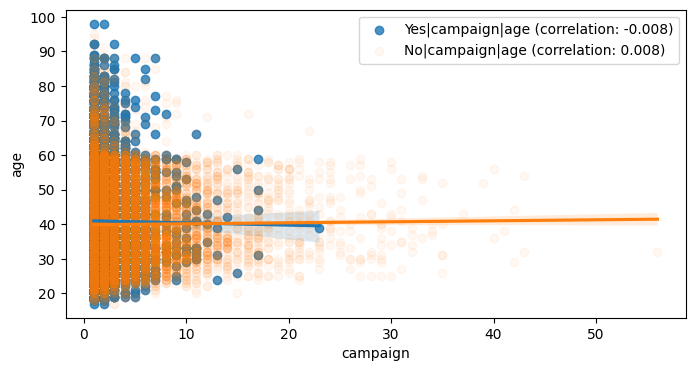

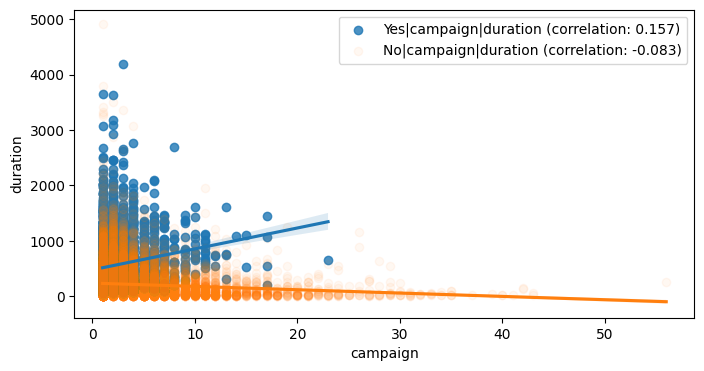

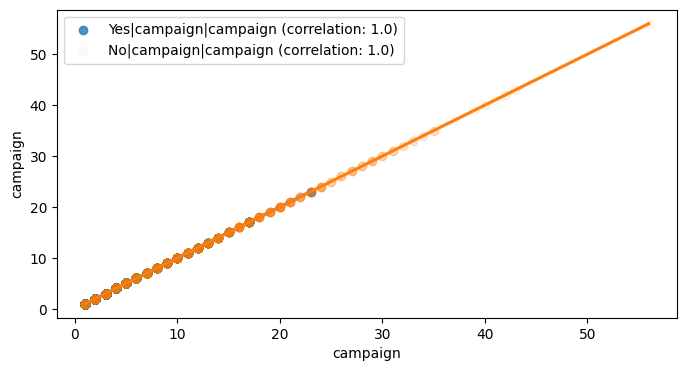

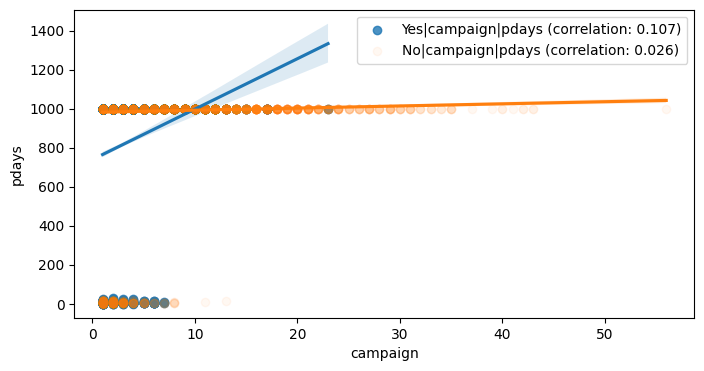

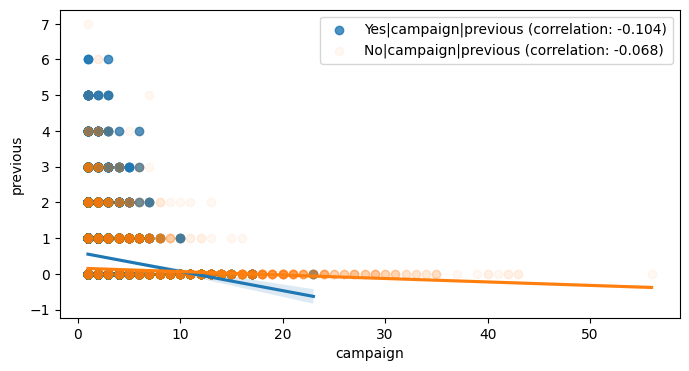

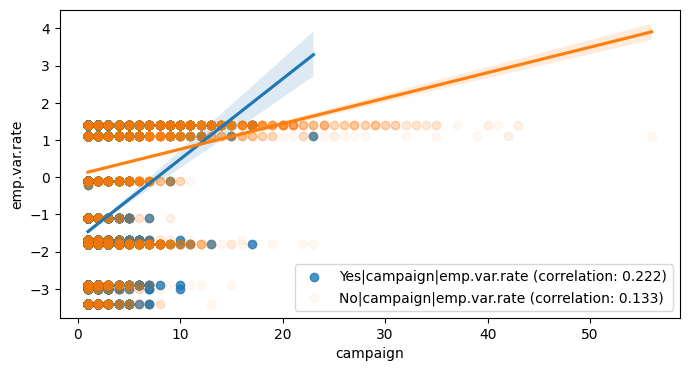

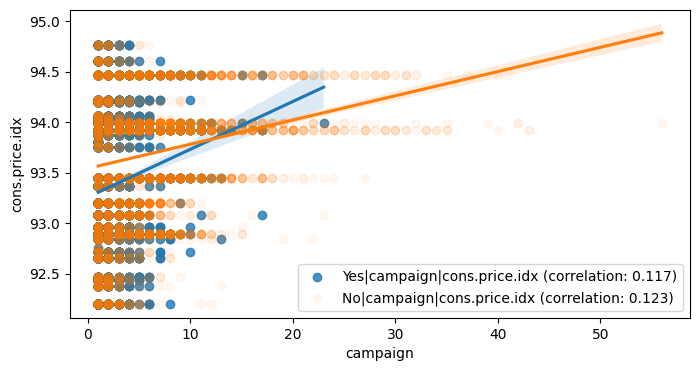

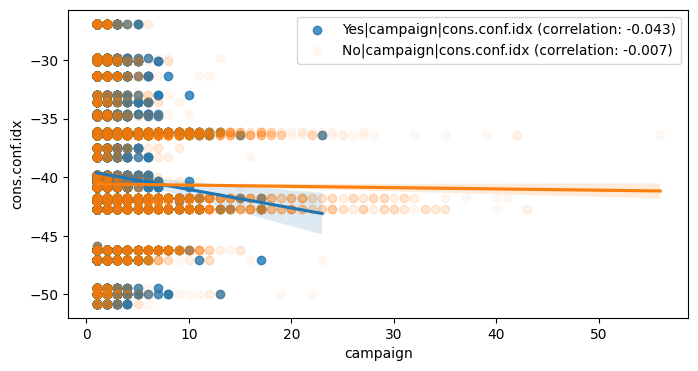

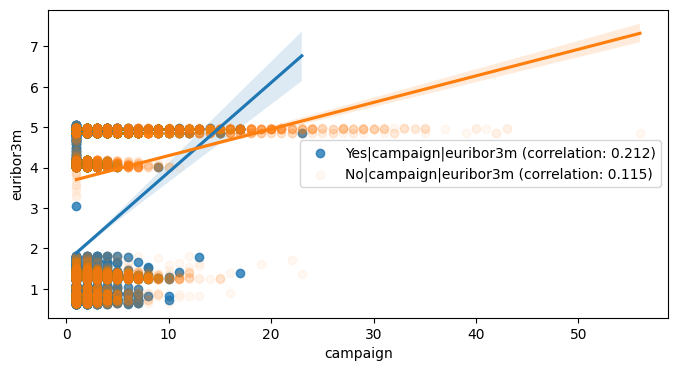

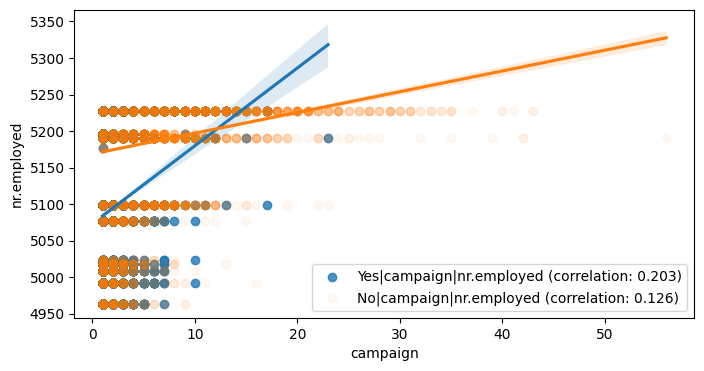

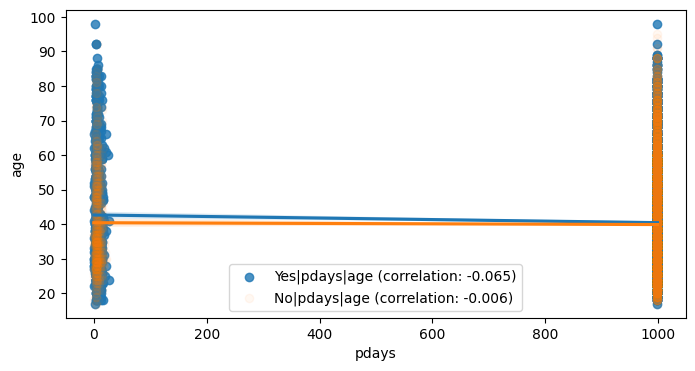

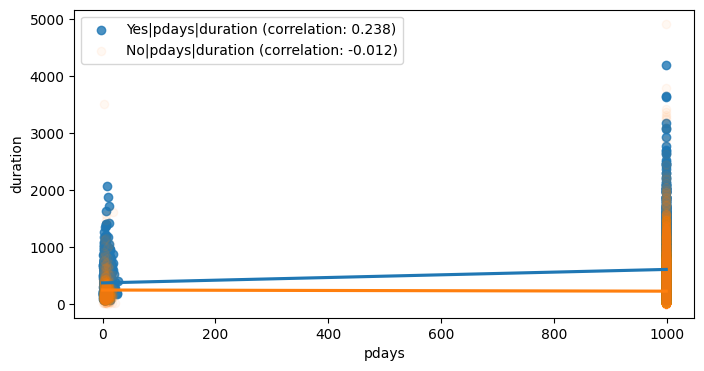

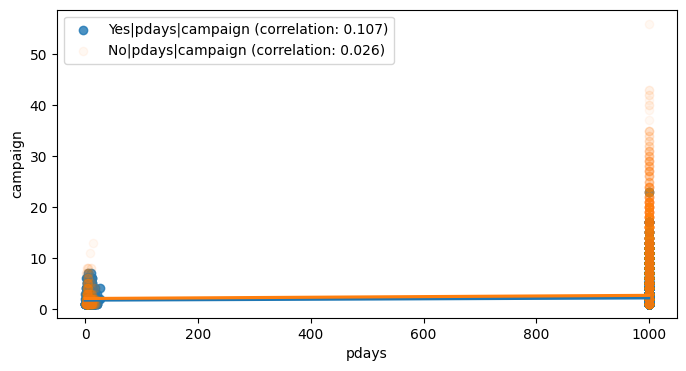

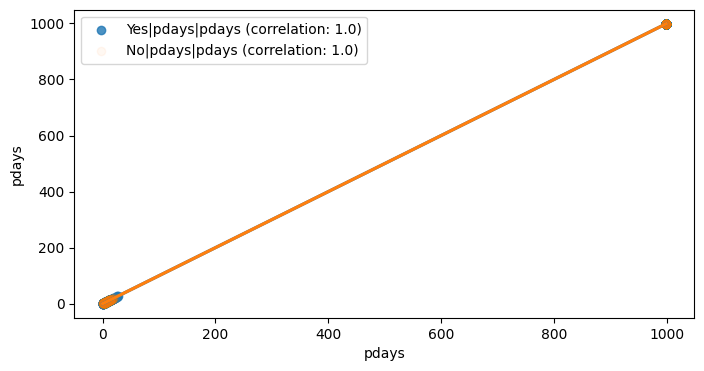

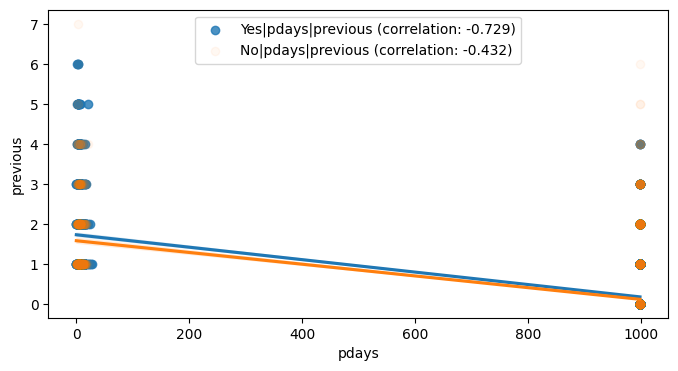

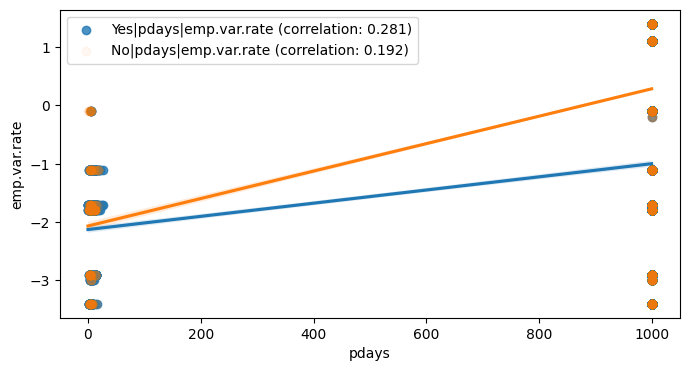

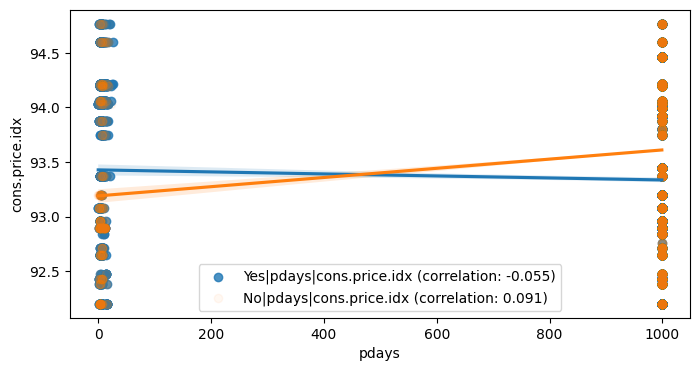

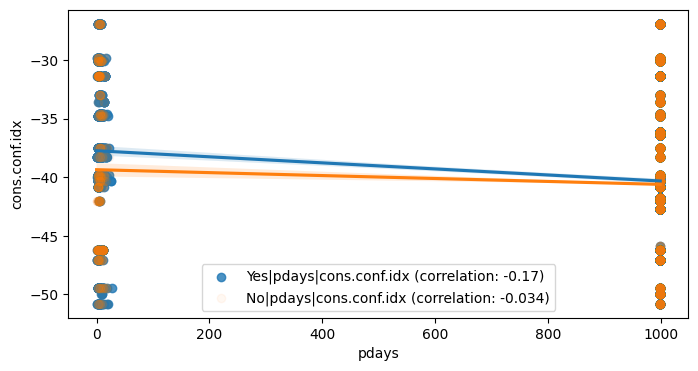

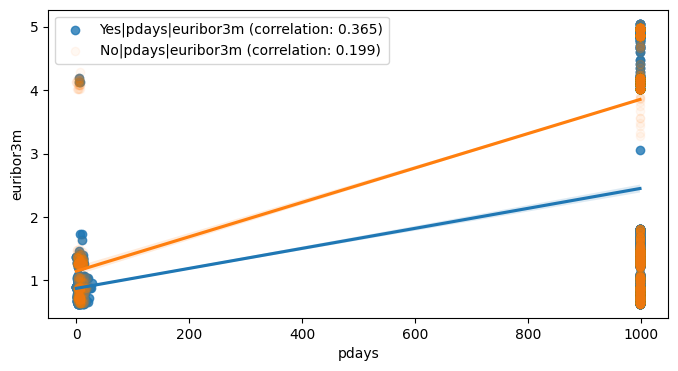

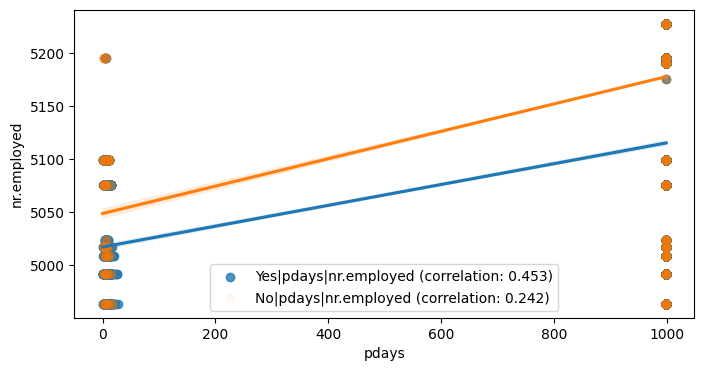

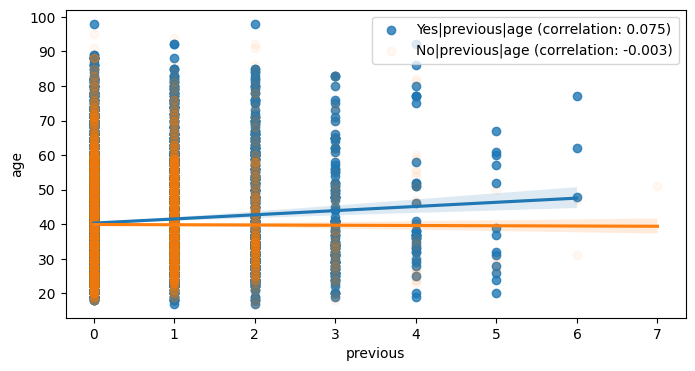

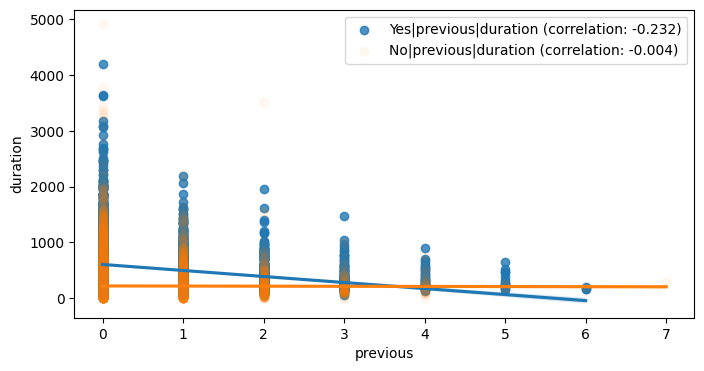

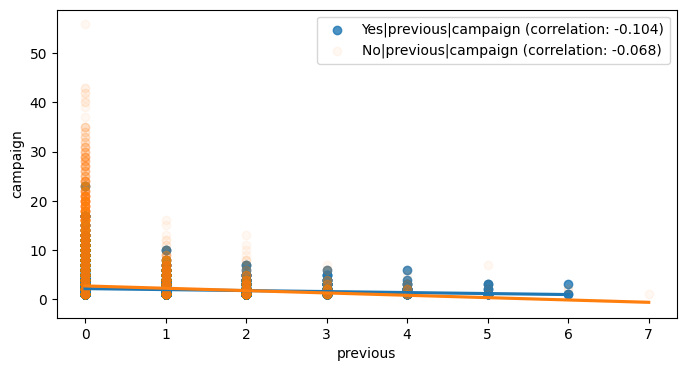

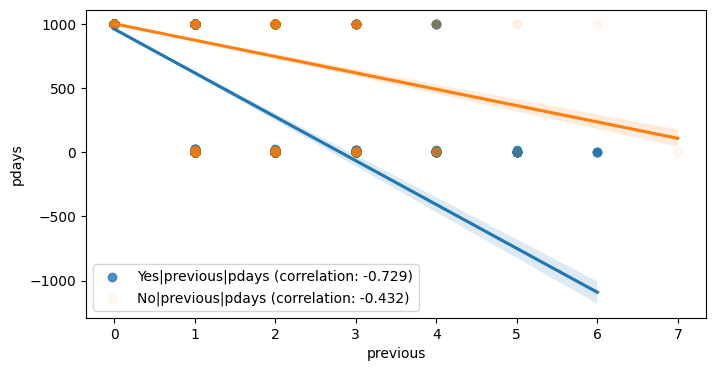

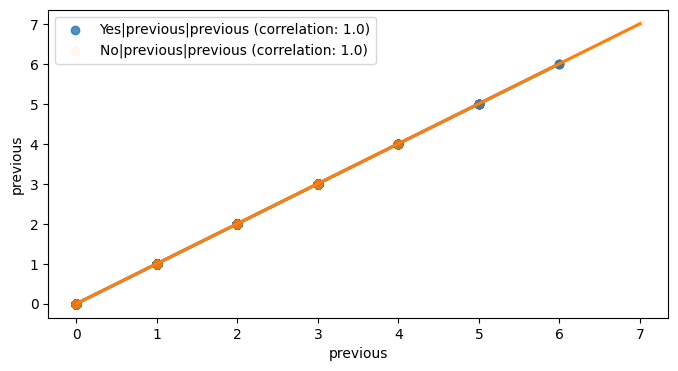

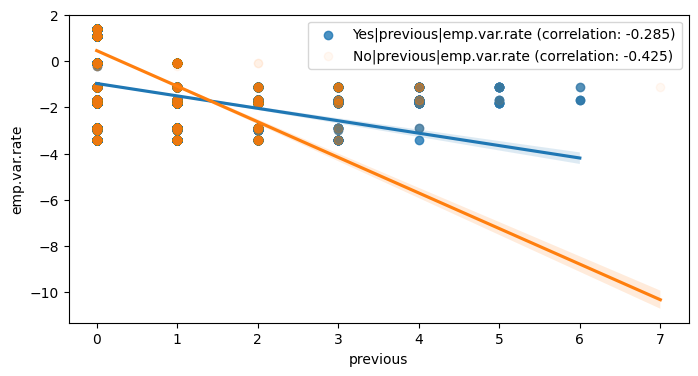

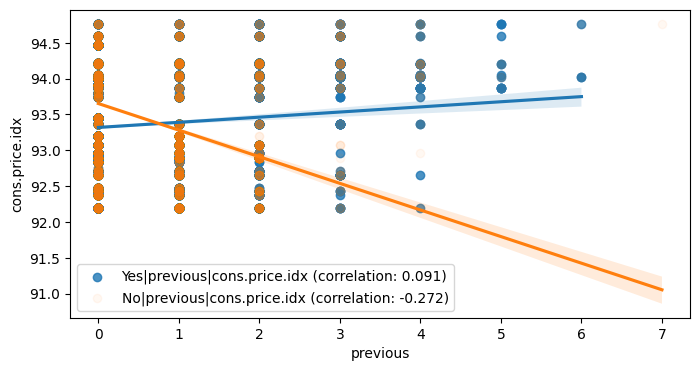

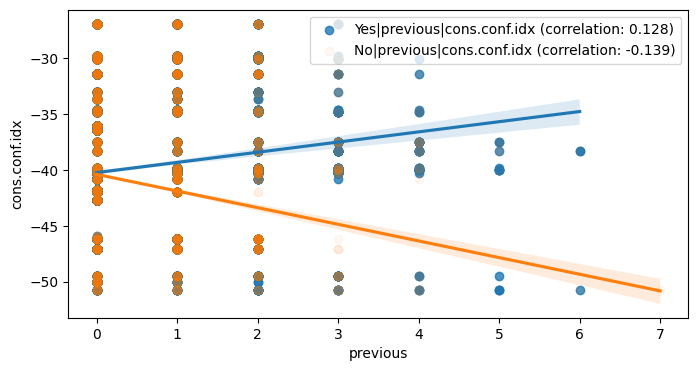

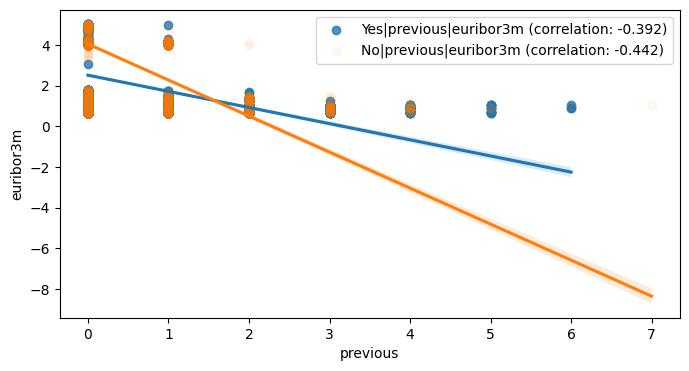

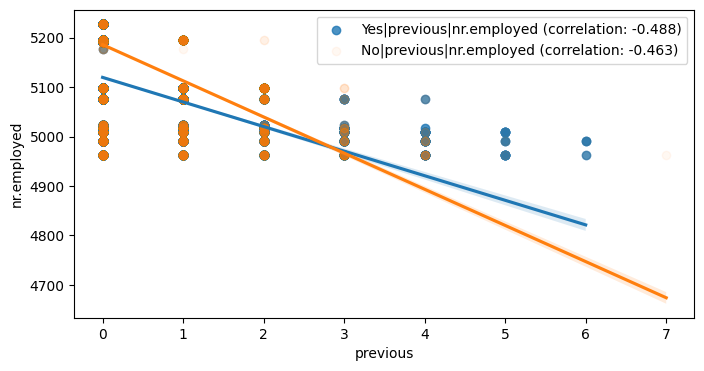

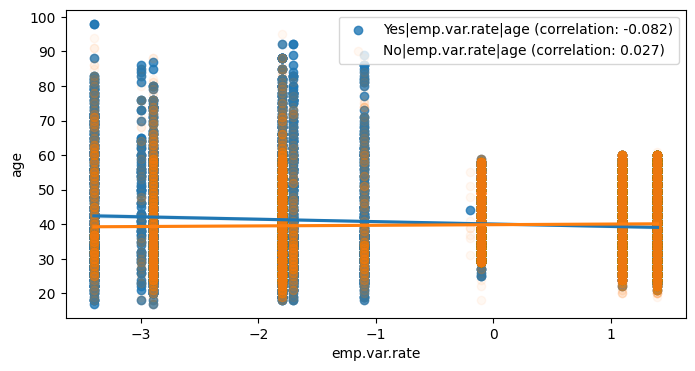

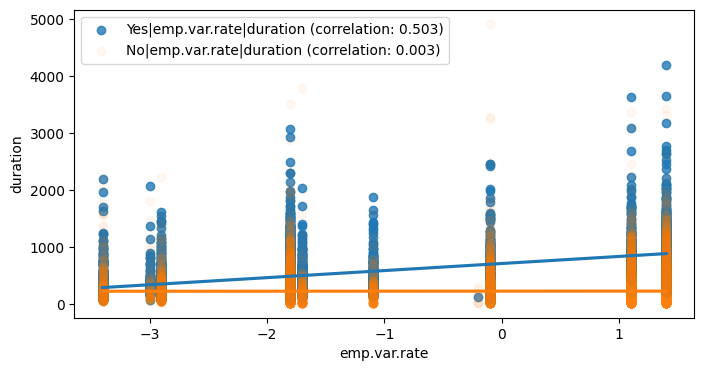

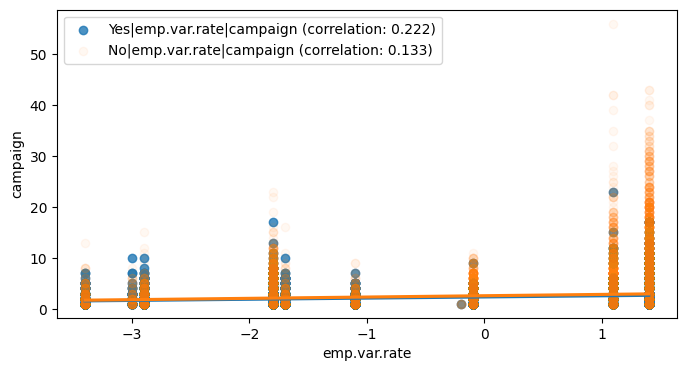

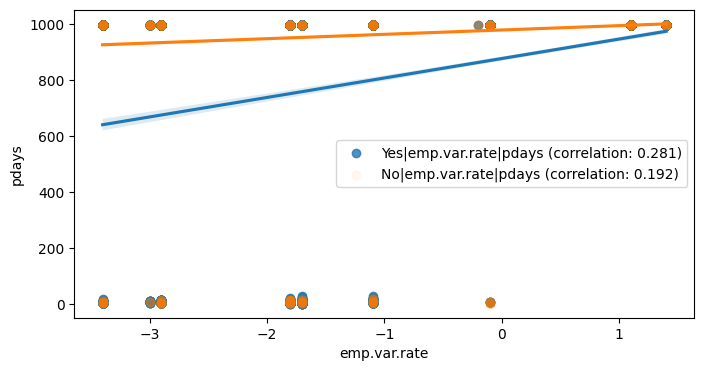

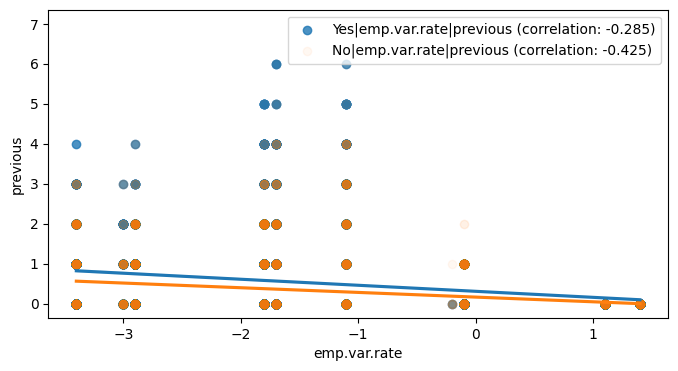

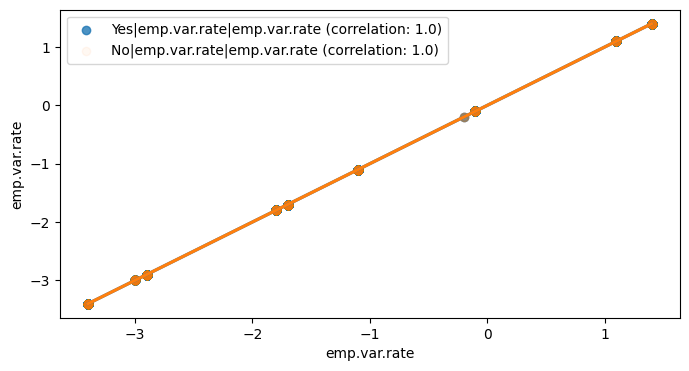

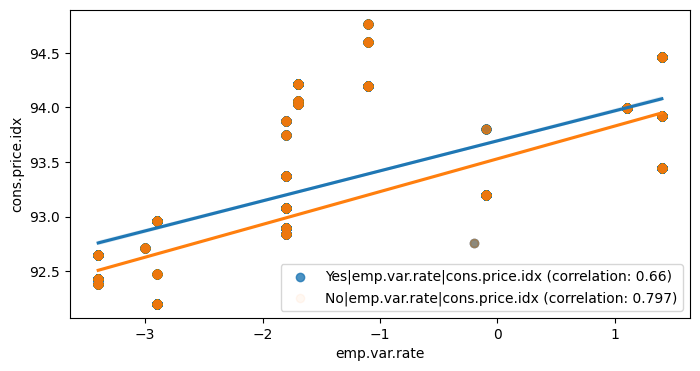

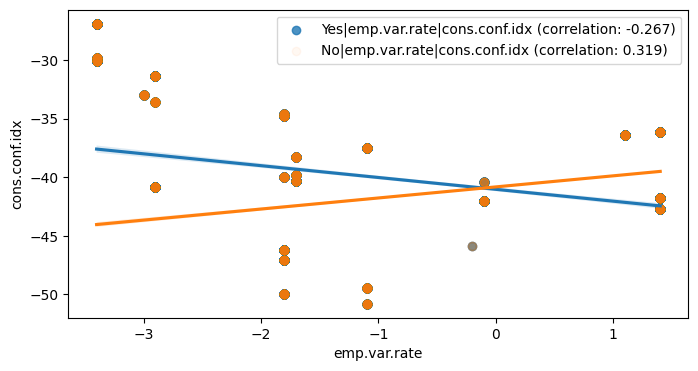

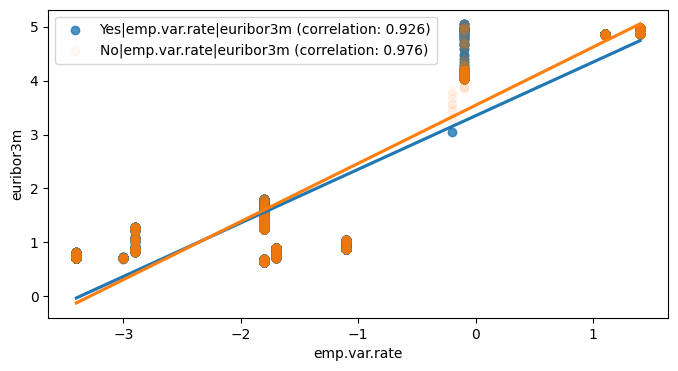

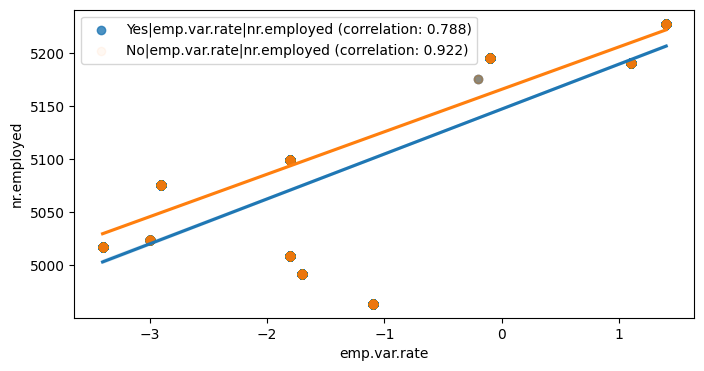

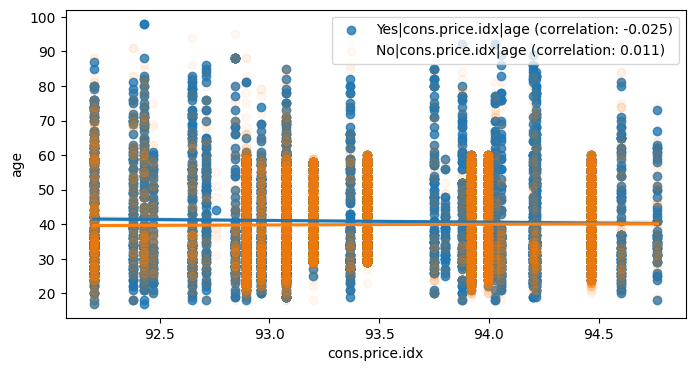

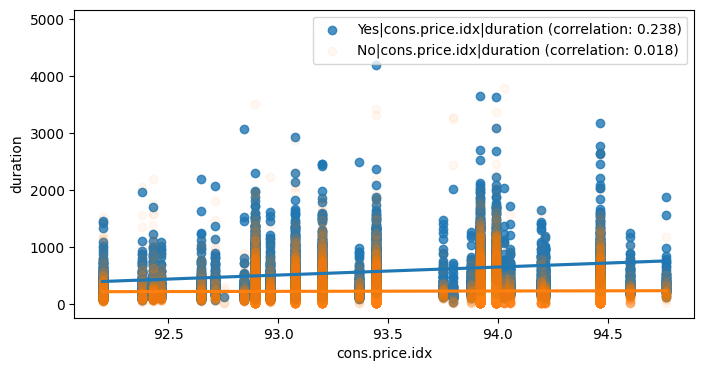

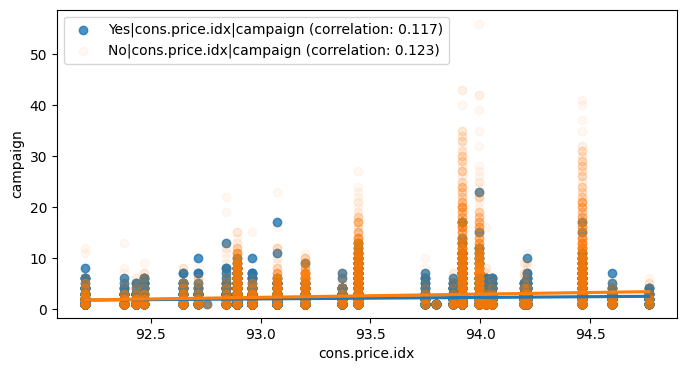

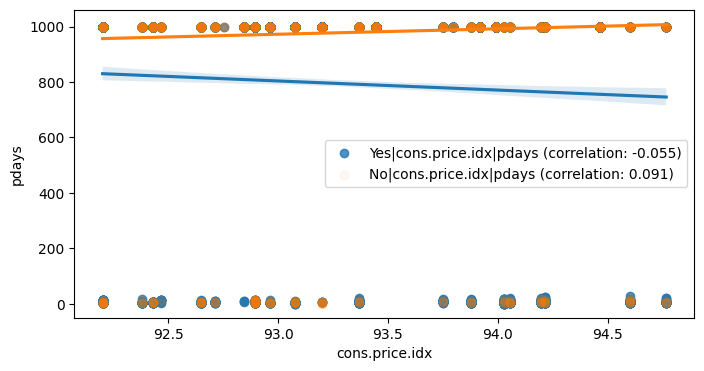

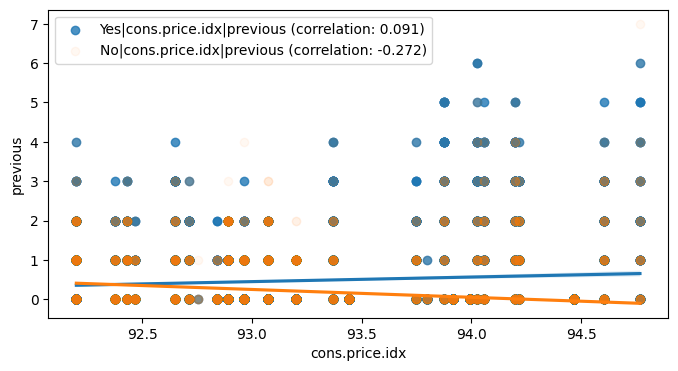

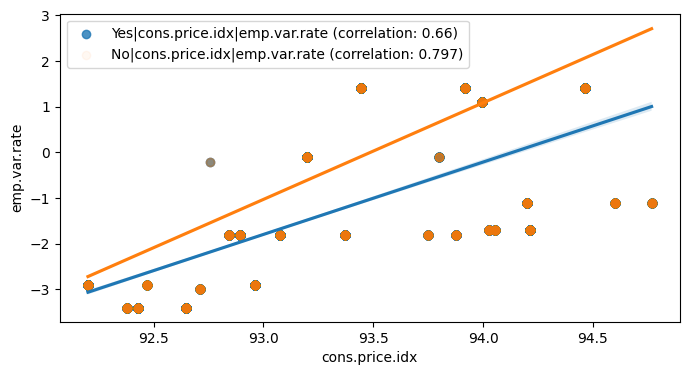

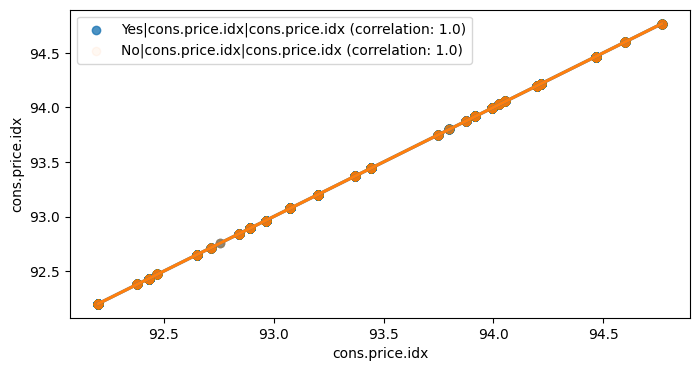

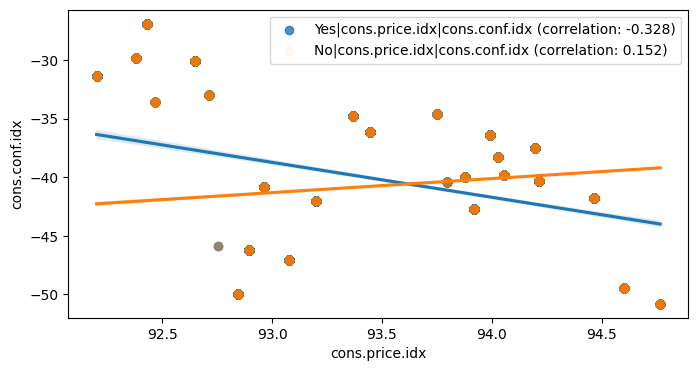

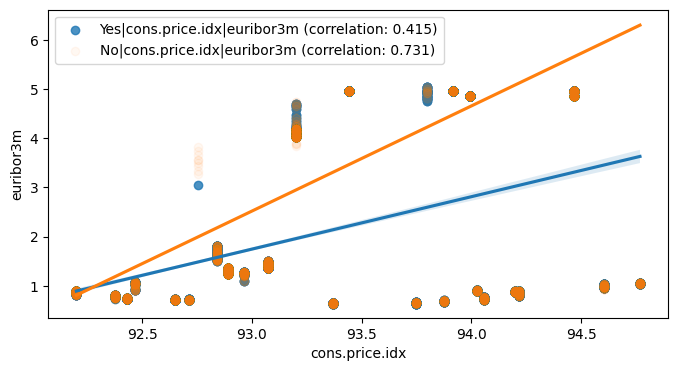

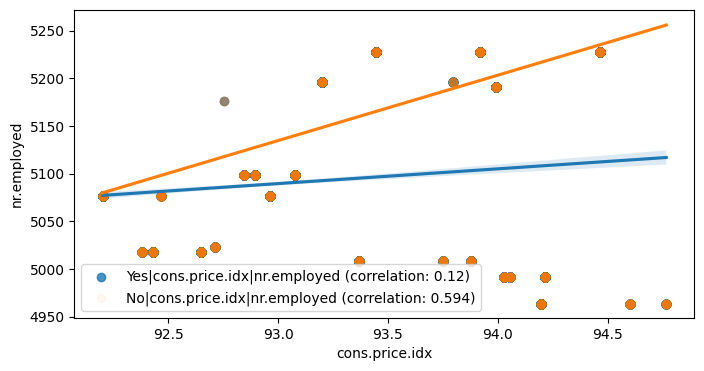

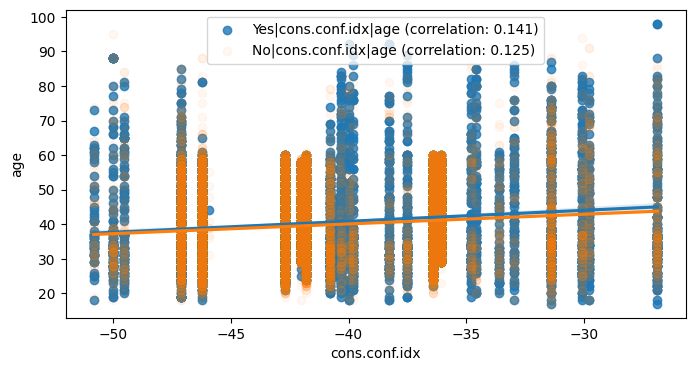

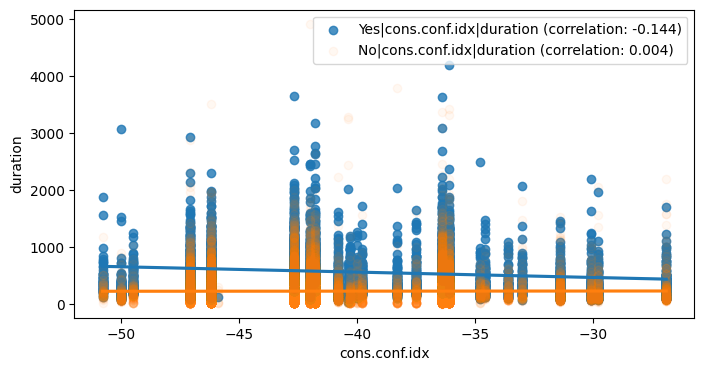

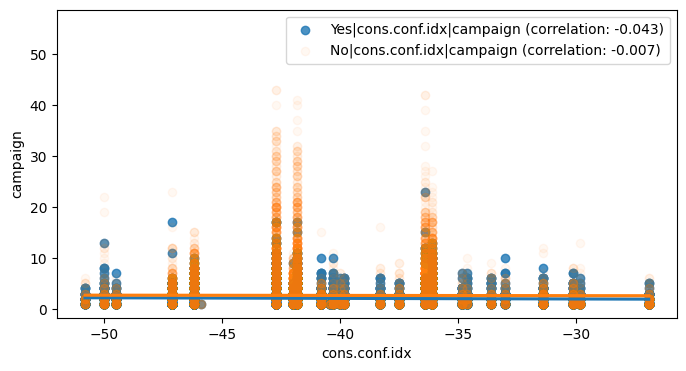

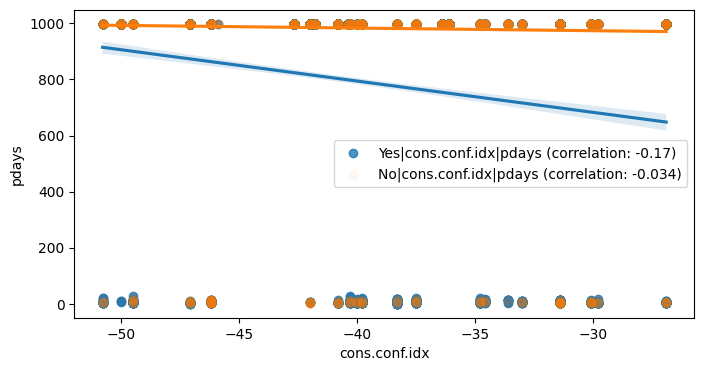

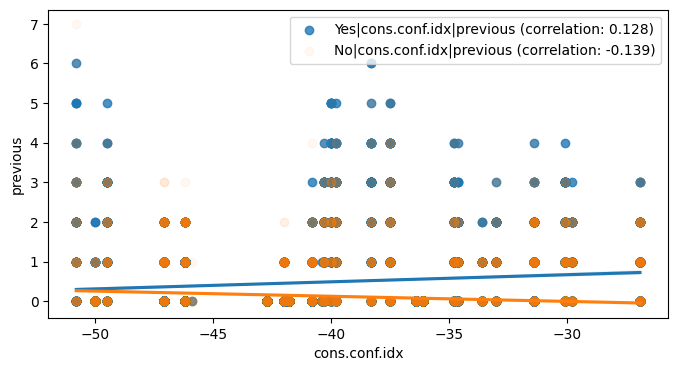

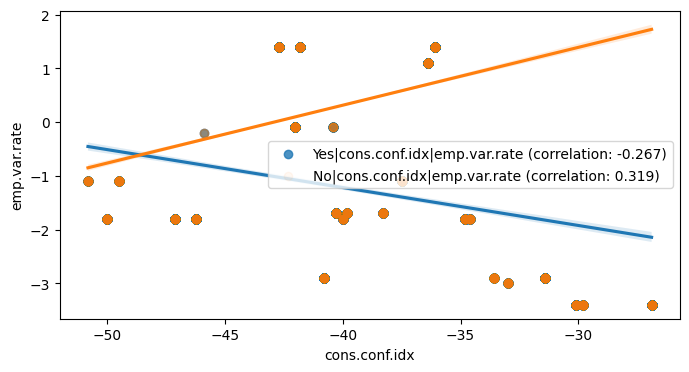

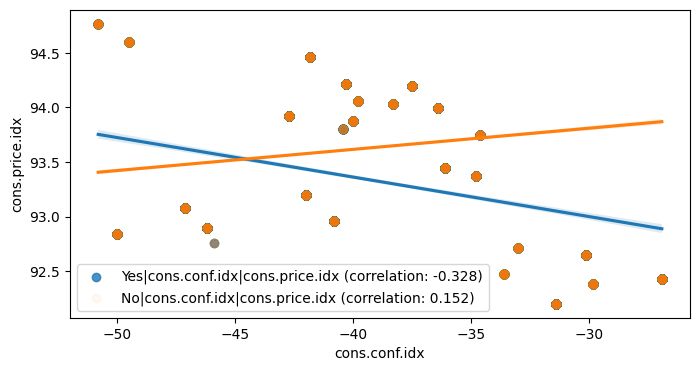

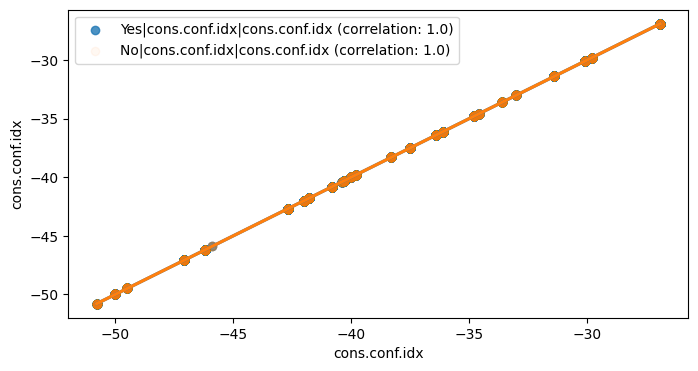

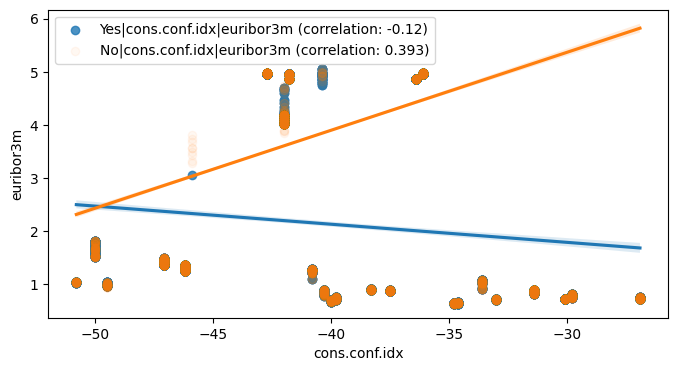

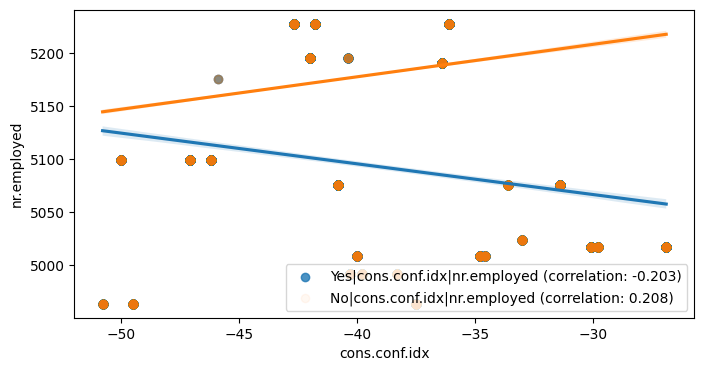

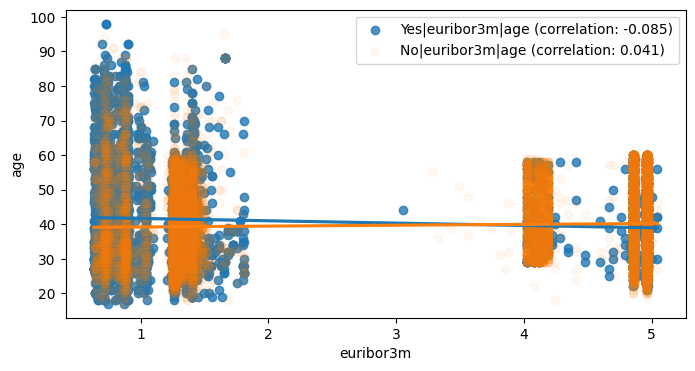

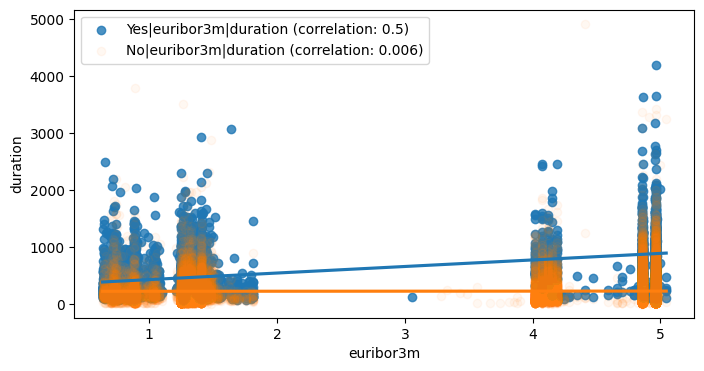

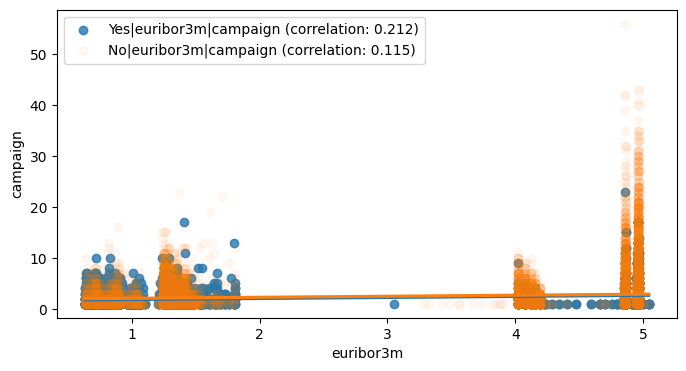

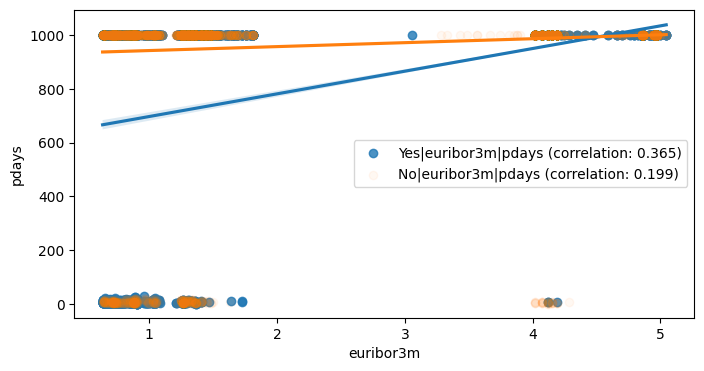

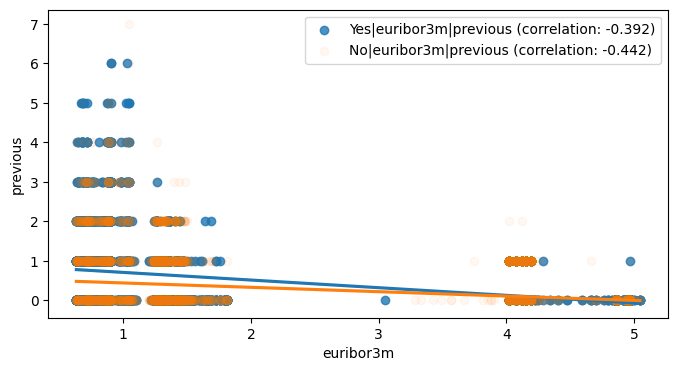

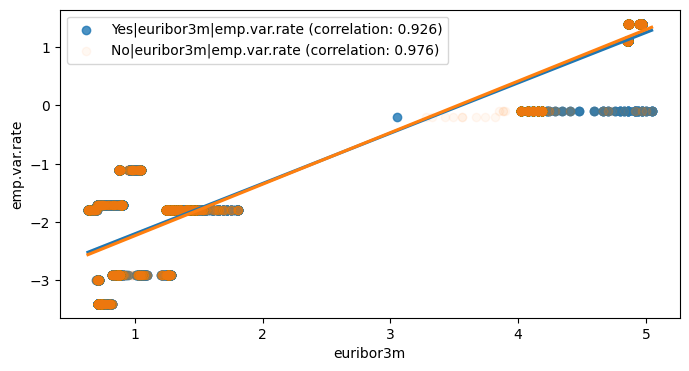

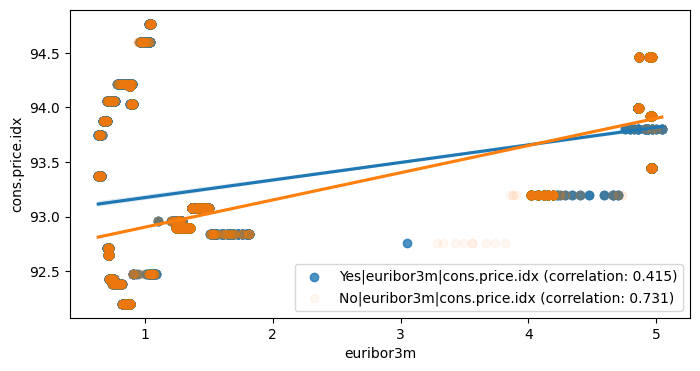

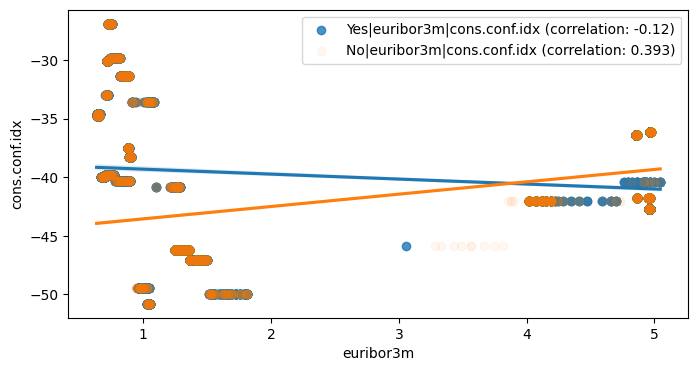

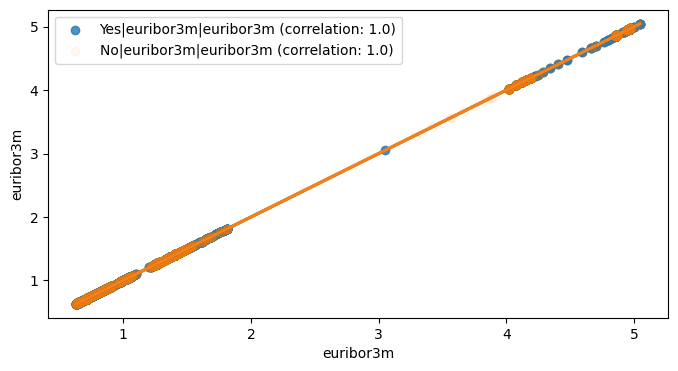

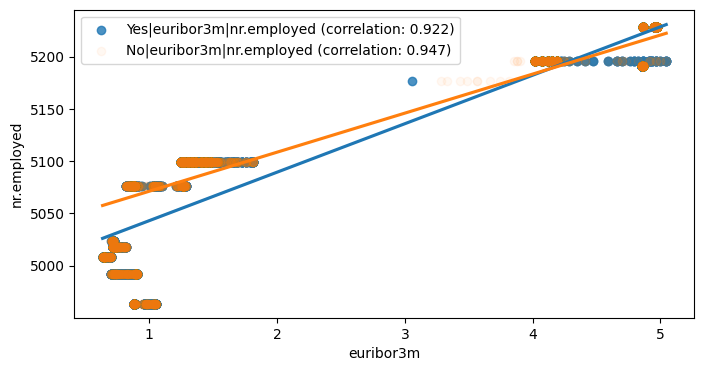

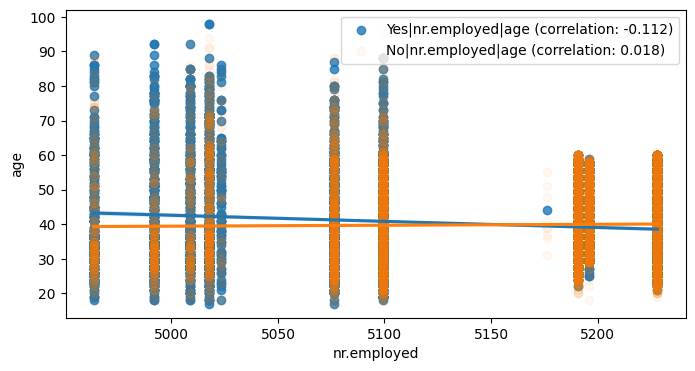

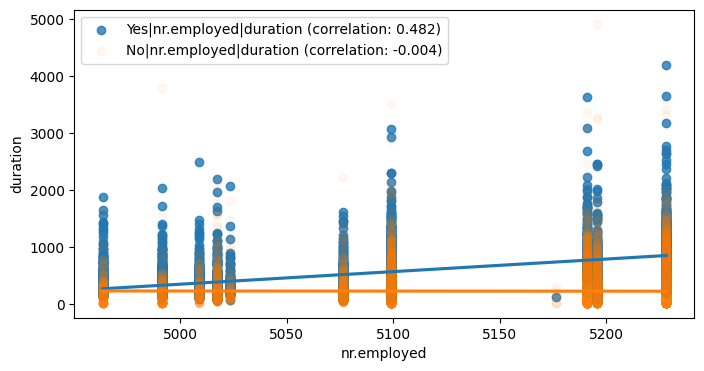

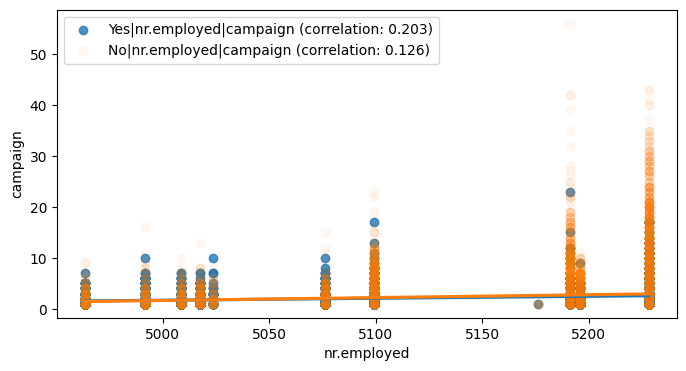

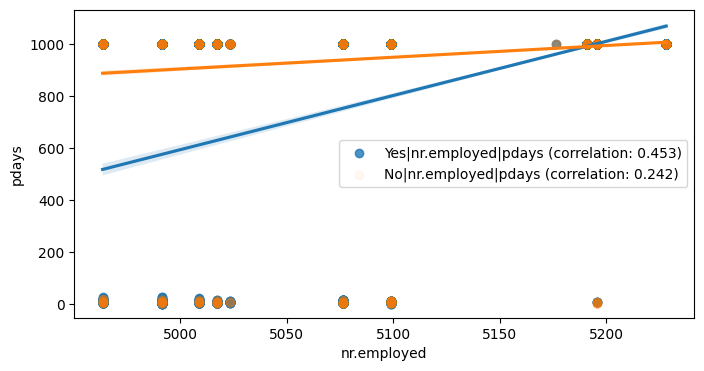

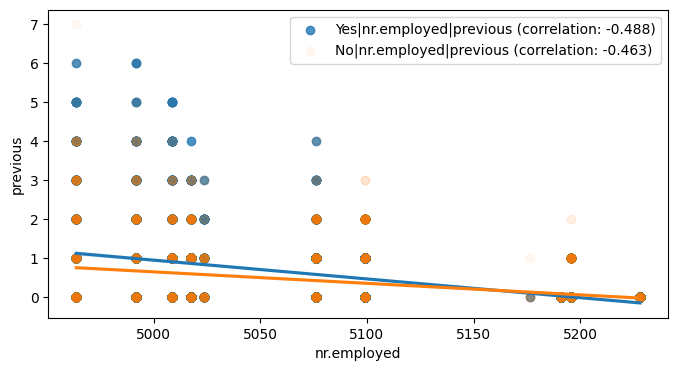

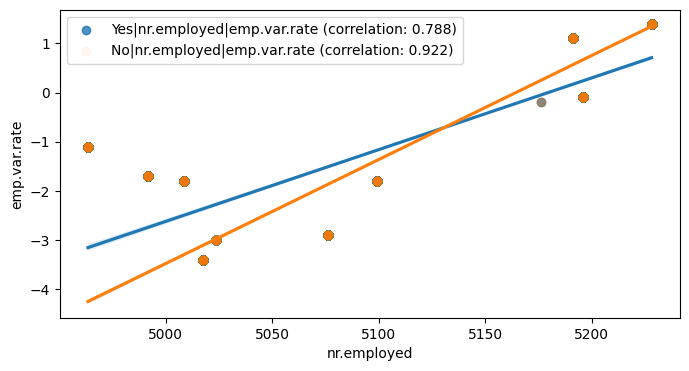

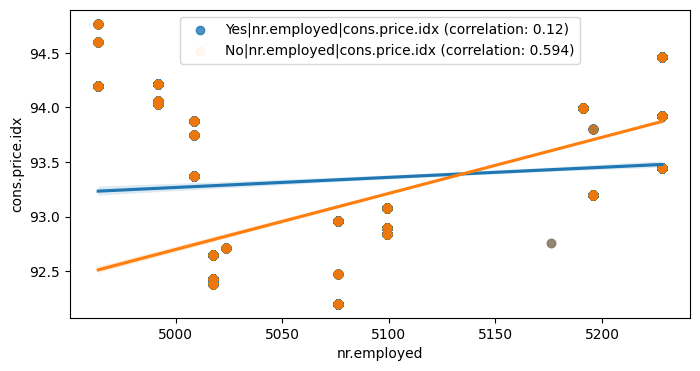

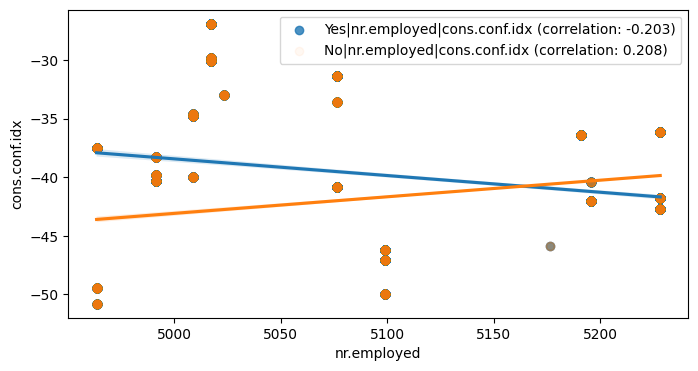

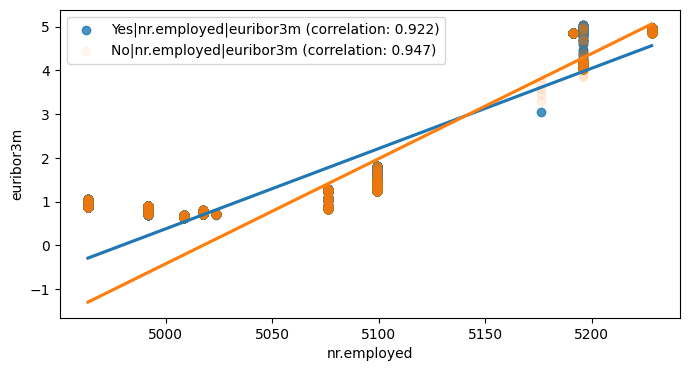

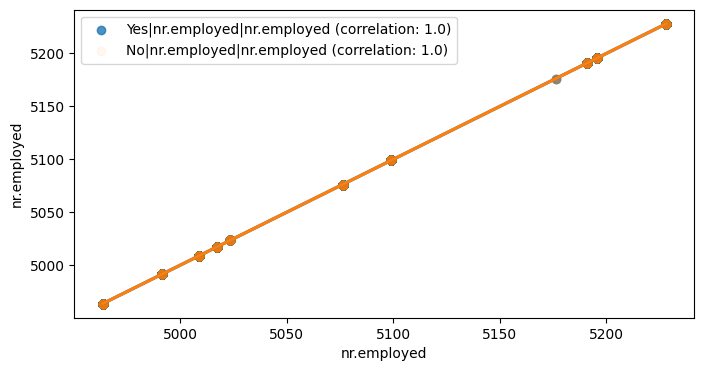

In [60]:
plot_correlation(numerical_data)